19-1 들어가며 <br>
19-2 Transfer Learning과 Language Modeling <br>
19-3 ELMO(Embedding from Language Models) <br>
19-4 GPT(Generative Pre-Training Transformer) <br>
19-5 BERT(Bidirectional Encoder Representations from Transformers) <br>
19-6 Transformer-XL(Transformer Extra Long) <br>
19-7 XLNet, BART <br>
19-8 ALBERT(A Lite BERT for Self-supervised Learning of Language Representations) <br>
<b> Node 19-2에 계속 </b> <br>
19-9 T5(Text-to-Text Transfer Transformer) <br> 
19-10 Switch Transformer <br>
19-11 ERNIE <br>
19-12 마무리하며 <br><br>

### 19-2 Transfer Learning과 Language Modeling
#### Transfer Learning(전이 학습)
전이 학습은 특정 환경에서 학습을 마친 신경망(일부 혹은 전부)을 유사하거나 다른 환경에서 사용하는 것을 의미한다. 쉽게 생각해 보면, 사과를 깎는 것을 배운 아이에게 배를 깎도록 다시 학습시키는 것이다. 이미 사과를 깎는 것을 배웠으니 비슷하게 생긴 배도 유사한 방법으로 쉽게 깎을 수 있을 것이라고 생각이 들것이다.

#### Language Modeling(언어 모델)
언어 모델은 입력으로 주어진 시퀀스의 다음을 학습하는 과정에서 주어진 시퀀스가 얼마나 자연스러운지를 학습하게 된다. 즉, 언어 모델은 '철수가 밥을 마셨다'인지 '철수가 밥을 먹었다'인지를 데이터로부터 학습을 하게 된다. 이렇게 학습을 완료한 언 어모델은 언어의 패턴과 규칙을 학습하여 전반적인 언어의 특징을 익히게 된다. <br>

자연어 처리에서 바로 이 언어 모델이 pretrained model이 되는 것이다. 이미 언어의 전반적인 것을 아는 신경망에게 언어와 관련된 문제를 풀게 하는 것이다. 이처럼 주어진 문제(다운스트림 테스크 혹은 downstream task)를 잘 풀기 위해 pretrained model을 재학습시키는 것을 fine-tuning이라고 부른다.

#### Transformer
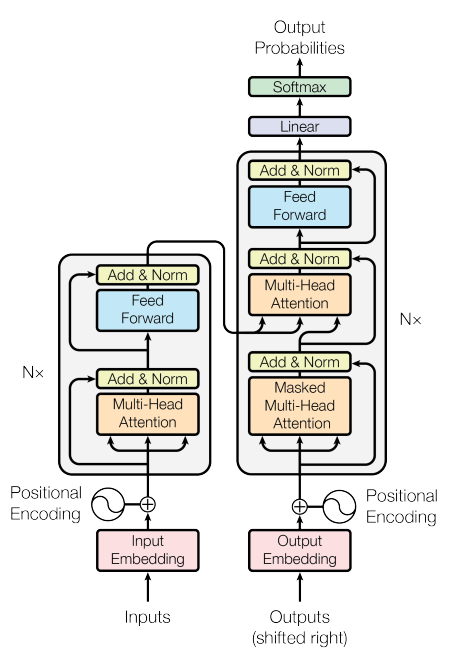 <br>

트랜스포머는 Encoder-Decoder 구조로, RNN이나 LSTM 등을 사용하지 않고 attention만을 이용한 모델이다. 그래서 비록 LSTM 등 RNN 구조를 사용하지 않지만 번역기 모델 등에 사용하는 seq2seq 모델과 구조적으로는 동일하다. Encoder-Decoder 모델이라면 입력부터 출력까지의 파이프라인이 이미 고정되어 있어서 이를 이용해 임베딩을 구하거나 전이 학습을 통해 다른 태스크에 활용하기 어려울 것 같다. 그렇다면 transformer 모델이 어떻게 modern NLP의 토대를 이루는 중요한 모델로 발전할 수 있었을까? <br><br>

### 19-3 ELMO(Embedding from Language Models)
#### ELMo의 구조
ELMo는 세가지 요소로 구성되어 있다. 첫 번째는 character-level CNN, 두번째는 bidirectional LSTM, 마지막으로 ELMo레이어가 있다. <br>
<b>1. character-level CNN</b> <br>
character-level CNN은 입력된 문자들 간의 관계를 파악하고 임베딩 벡터로 변환하는 역할을 한다. ELMo는 character level로 문자를 인식한다. 좀 더 구체적으로 말한다면, 해당 chracter의 유니코드 ID를 입력으로 받는다. 이렇게 각각 입력받은 단어의 사작과 끝에 해당하는 스페셜 토큰 <BOW>와 <EOW>에 해당하는 유니코드를 앞뒤로 붙여준다. 이후 각 유니코드 아이디에 해당하는 행 벡터를 참조하여 붙인다.(look-up-table) <br>
만들어진 벡터에 (n*임베딩 차원의 수) 필터로 컨볼루션하여 피처맵을 만들고 max-pooling하여 하나의 값을 뽑아낸다. 이러한 작업을 반복하여 사용자가 원하는 크기만큼의 벡터로 만들어 낸다. <br>
여기서 n은 한번에 몇 개의 문자들을 함께 볼 것인가를 의미한다. n이 2라면 <BOW> ㅂ, 바, ㅏㅂ, ㅂ <EOW>이렇게 문자 2개씩 보면서 2개 사이의 관계를 파악하는 CNN이 된다. <br>
ELMo의 original 코드에서는 각기 다른 사이즈를 가진 7개의 필터를 이용하여 2048차원의 벡터를 만든다고 한다. <br>
<b>2. bidirectional LSTM</b> <br>
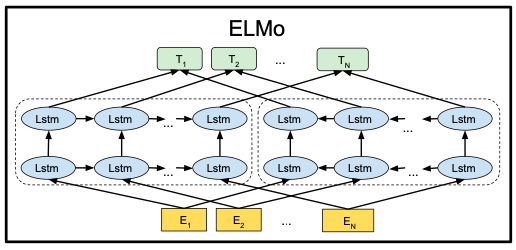 <br>
character-level CNN을 통과하여 만들어진 벡터 $(E_1, E_2, ..., E_N)$ 들은 bidirectional LSTM을 통과하게 된다. pretrain시에 bidirectional LSTM은 주어진 입력에 다음에 올 단어들을 예측한다. (bidirectional LM이라고도 불리운다.) <br>
bidirectional이라는 것은 양방향으로 학습하는 것을 의미한다. 주어진 입력을 한번은 순방향으로, 한번은 역방향으로 각각 2개의 LSTM layer를 통과하게 된다. 이렇게 양방향으로 학습하는 것은 모델의 사이즈와 학습에 걸리는 시간이 늘어날 수는 있지만 그만큼 성능이 좋다고 한다. <br>
pretrain시, 순방향과 역방향으로 LSTM을 통과한 히든 벡터들은 이후 softmax(소프트 맥스)를 취해 다음 단어를 예측하게 된다. 이때 <b>ELMo는 순방향과 역방향의 벡터를 합치거나 더하지 않는다.</b> 각각의 <b>독립적인</b> 모델처럼 행동하게 되는데, 이는 조금만 생각해 보면 이유를 알 수 있다. 하나는 순방향으로, 하나는 역방향으로 진행하다 보니 cheating(다른 방향의 모델에게 정답을 가르쳐 줌)의 가능성이 있기 때문이다. <br> 이렇게 ELMo는 단어를 하나씩 하나씩 슬라이딩하여 다음 단어를 예측하면서 문장 내의 단어와 단어들 사이의 관계를 학습하게 된다. <br>
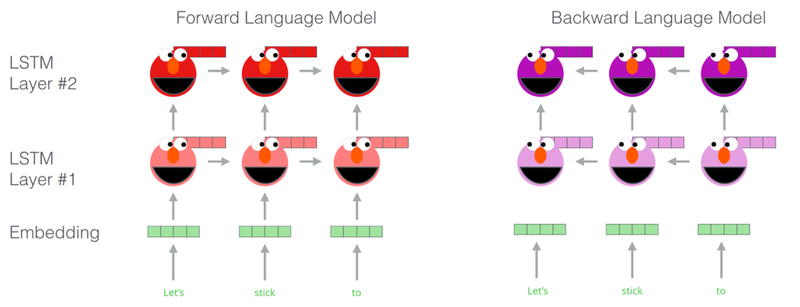 <br>
    
<b> 3. ELMO 임베딩 레이어 </b> <br>
ELMo 임베딩은 pretrain이 끝나고 finetuning을 하는 과정에서 만들어진다. <br>
맨 위 그림에서 Elmo 인형과의 대화처럼 stick이란 단어의 임베딩을 구한다고 가정해 보자. <br>
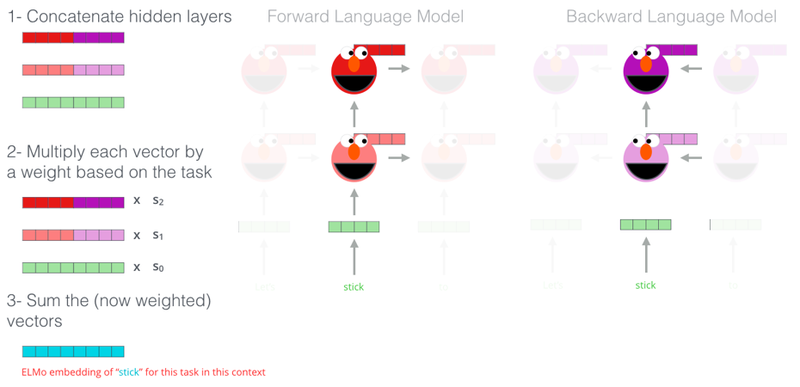 <br>
우선 구하려고 하는 토큰에 대한 각 층의 출력값을 모두 가지고 온다. 여기서의 각 층의 출력값이라고 하면, 임베딩 벡터(character-level CNN을 통과한 후 나오는 벡터), 각각의 LSTM layer에서의 hidden vector를 의미한다. <br>
각 층 1, 2, ..., 1, ... 마다 가중치 $ S_1, S_2, ..., S_l, ... $를 곱해서 모두 더해준다. (weighted sum 혹은 가중합을 해준다고 말할 수 있다.) 마지막으로 다운스트림 태스크의 가중치 y를 곱하면 ELMo의 임베딩이 된다.
    여기서 갑자기 등장하는 가중치 S_1와 Y는 다운스트림 태스크별로 <b>finetuning시 학습</b>되는 값들이다. 복잡해 보이지만, <b>구하고자 하는 토큰에 대한 각층의 출력값을 가중합한 것</b>이 ELMo 임베딩이다. <br>

#### ELMo의 이용
6가지 task로 평가한다. <br>
    - Question Answering <br>
    - Textual Entailment <br>
    - Semantic Role labeling <br>
    - Coreference Resolution <br>
    - Named Entity Extraction <br>
    - Sentiment Analysis <br><br>
    
    
### 19-4 GPT(Generative Pre-Training Transformer)
GPT는 <b>트랜스포머의 decoder 구조만을 이용하여 만든 네트워크</b>이다. 트랜스포머의 decoder를 아주 깊고 깊게 쌓아 많은 데이터를 학습 시켜 성능을 높힌 네트워크다! <br>
    
#### GPT의 구조 
'Decoder만을 이용했다는 게 뭐야?'라는 생각이 든다면 다음 그림 참고 <br>
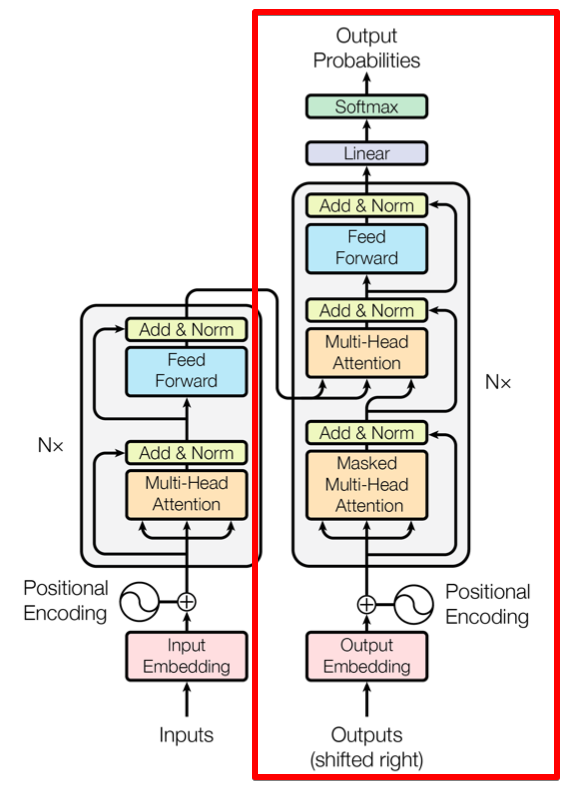<br>
Decoder는 masked Multi-Head Attention, Multi-Head Attention, Feed Forward Neural Network로 이루어져 있었다. 바로 이 구조를 차용하여 Decoder block를 많이 쌓아 올리면 바로 GPT가 되는 것이다. <br>
    
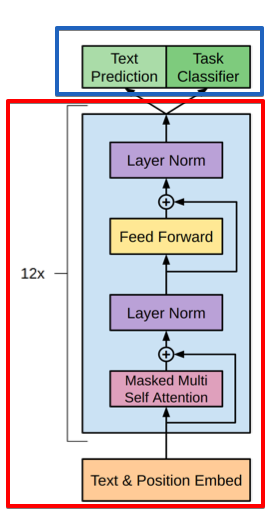 <br>
<b>1.Embedding </b><br>
GPT는 텍스트의 Embedding으로 <b>BPE(Byte-pair Encoding)</b>을 사용하고 있다. <br>
BPE는 모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자 쌍을 합치는 subword tokenization이었다. 처음 보는 단어일지라도 문자(알파벳)들의 조합으로 나타내어 OOV 문제를 해결할 수 있다는 장점이 있었다. <br>
기존 트랜스포머와 마찬가지로 position encoding(포지션 인코딩)도 함께 사용한다. <br>

<b>2. Masked Multi-Head Attention</b> <br>
<b> Masked Multi-Head Attention</b> 모든 것을 병렬적으로 처리하는 트랜스포머에게 자기회귀적(Autogressive)인 특성을 부여하기 위해 만든 장치이다. 여기서 자귀회귀적이라 함은 훈련 단계에서 디코더에게 정답 문장을 매 스텝 단위로 단어 하나씩 알려주고 그 다음 단어를 예측(Next Token Prediciton)하게 하는 형태로 학습되는 형태라는 뜻이다. 이는 마치 sequence-to-sequence모델에서 디코더가 번역 분장을 생성할 때 time-step을 하나하나 거치듯이 만들어주는 것이다. 순차처리 방식의 RNN과 달리 정답 문장의 모든 단어를 한꺼번에 입력받는 트랜스포머의 decoder는 학습할 때 현재 자기보다 미래에 생성될 토큰을 보지 못하도록 masking이 필요하게 된다. <br>
    
사실 이 구조는 <b>언어 모델</b>과 같은 구조다. 다시 한번 되짚어 보자면, 언어 모델은 비지도 학습을 통해 문장의 자연스러운 순서를 학습하게 e된다. 그래서 GPT는 문자 생성에 매우 특화되어 있다. GPT를 연구한 Open AI도 너무나 자연스러운 문장을 만들어내서 그 악용이 두렵다며 전체 소스 코드를 공개하지 않았을 정도이니깐! 그렇다고 해서 요약, 텍스트 분류 등 다른 task들에서 성능이 떨어지는 것은 아니다. <br>

pretrain이 끝나게 되면 GPT는 downstream task에 맞게 finetuning을 하게 된다. 파란색 박스 부분에 해당되는 부분이 기존에 봐왔던 모델들과 조금 다른 점을 발견할 수 있는데 바로 <b>두 개의 Objective</b>가 존재하는 것이다. <br>

text prediction과 text classification이 각각 다른 모델들을 이용하여 output을 만들어내는 것이 아니라 한 모델에서 동시에 output을 내는 것이다. (Auxiliary objective) 주요 task에 대한 정확도가 더 올라갔음을 확인했다고 한다. 생각해 보면 LM 또한, auxiliary로 얻어진 결과라고 생각할 수 있다. 시퀀스의 다음 나올 단어들을 학습하다 보니 전체적인 언어의 구조를 알게 된 것이다.

그렇다면 GPT의 모델 부분을 코드로 한 번 확인해 볼까요? 전체 코드를 한 번에 보면 복잡해 보일 수도 있겠지만, TFGPT2MainLayer라는 전체 모델 클래스 안에서 TFBlock 레이어 클래스를 반복해서 사용하고 있는 부분을 눈여겨 봐주셈. TFBlock 클래스 안에서 TFAttention, TFMLP 레이어가 사용되는 구조가 위에서 소개한 GPT의 모델 구조 그림에 표현되어 있다. <br><br>
    

### 19-5 BERT(Bidirectional Encoder Representations from Transformers) <br>
Sesame Street에서 ELMo에 이어 BERT까지 캐릭터 이름들을 따왔다. <br>
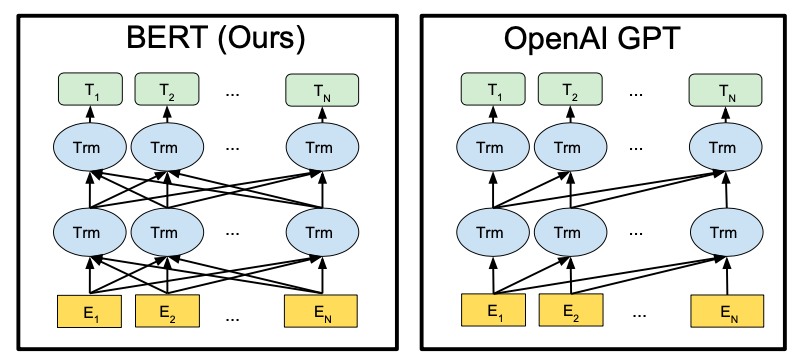 <br>
    
트랜스포머의 decoder를 이용하여 만든 모델인 만큼 GPT는 input을 한 방향으로만 (uni-direction)보게 된다. 다음 단어를 예측해야만 하는 LM의 특징이었다. 이와는 다르게 BERT는 양방향(bi-direction)으로 input을 보고 있는 것을 확ㅇ니 할 수 있다. (사실 BERT의 Bi-direction을 의미하고 있다.) <br>
    
그림에서는 보이지 않지만 또 다른 큰 차이점이 존재한다. BERT는 트랜스포머의 encoder만을 사용한 모델이다. <br>
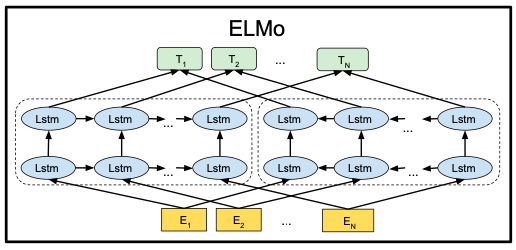 <br>

다음은 ELMo와의 비교이다. <br>
    
ELMo가 bidirection LSTM을 사용하긴 했지만 <b>독립적인 모델처럼 학습</b>하고 마지막 layer에서만 합쳐준다. 따라서 ELMo는 가장 위에 layer만 양방향 정보를 가지고 있다. 이는 모든 layer들이 양방향으로 보는 BERT와 가장 큰 차이점이라고 할 수 있다. 
    
BERT는 이처럼 진짜 <b>bi-direction</b>이 뭔지 보여주기 위해 만들어진 모델이다. 이제 BERT의 핵심 아이디어를 알았으니 더 자세하게 알아보자.
    
#### 1. BERT의 구조
앞서 말했듯이 BERT는 트랜스포머의 encoder구조를 이용한 모델이다. 이제부터는 트랜스포머와의 차이점을 위주로 이야기해 보겠다. <br>
<b> 1.Transformer Encoder Block </b><br>
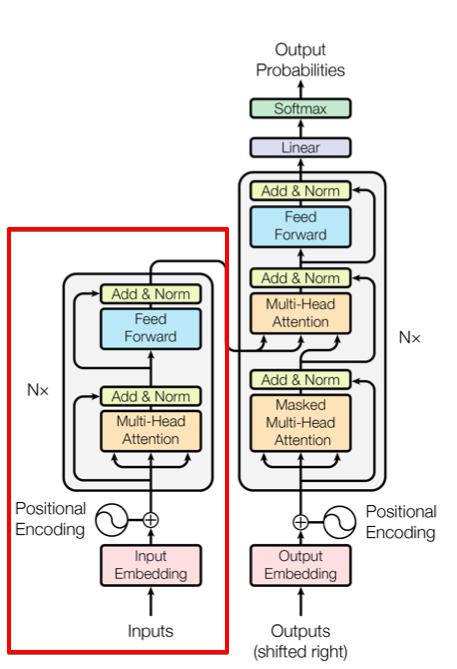 <br>
<b> 1) Embedding(임베딩) </b><br>
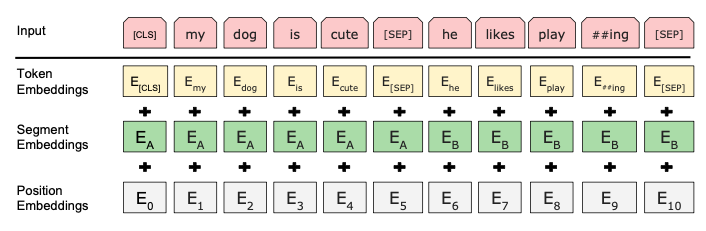 <br>
    
BERT는 기존의 트랜스포머와응 유사하지만 다른 임베딩 체계를 가지고 있다. 3가지 임베딩을 가지고 있다. <br>
- <b>Token Embedding</b>
우선은 Wordpiece을 이용하여 3만개의 vocabulary를 학습한다. 학습한 Wordpiece model을 이요하여 token들을 임베딩해준다. <br>

- <b>Segment Embedding </b>    
BERT는 두 가지 sentence(BERT의 논문에서 나오는 sentence는 문장의 의미보다는 텍스트 덩어리의 의미이다.)를 입력으로 받기 때문에 이 두가지 sentence를 구분해야 할 필요가 있다. segment embedding은 바로 이를 위해 존재한다, 모델입장에서 주르륵 이어진 텍스트들의 덩어리를 나누어주는 역할을 한다. 그림에서도 [SEP]토큰으로 구분된 두 sentence에서 앞부분은 A, 뒷부분은 B로 나누어 임베딩하는 것을 확인할 수 있다.

- <b>Position Embedding</b>
마지막으로 position embedding이다. 두 sentence를 나누는 것은 segment embedding에서 해주지만, sentence안에서의 순서는 아직 모르는 상태이다. 따라서 문장내에서 절대적인 위치(순서)를 알려주기 위해 필요한 것이 position embedding이다. 
    
<b>Q) Positional encoding과 position embedding 어떤 말이 맞는걸까? 트랜스포머와 GPT에서는 positional encoding이라고 했는데.. 똑같은 것 아닐까?</b>
아니다, 혼용하여 사용하긴 하지만 엄밀하게 말하면 다른 개념이다. encoding은 one-hot-encoding(원핫 인코딩)처럼 미리 정해진 값을 주는 것이지만 embedding은 그 값이 정해진 것이 아니라 학습을 통해 습득하는 것을 의미한다. 다시 말해서, BERT는 학습을 통해 position정보를 습득한다고 생각하면 된다. 
    
이렇게 얻은 3가지 임베딩을 모두 합산해 주면 BERT의 임베딩이 완성된다. 이후 layer normalization과 dropout까지 해주면 트랜스포머 첫 블록의 입력이 완성된다. [sep]토큰은 special token이라고 해서 실제 단어에서는 쓰이지 않지만 특별한 역할들을 가지고 있는 아이들이다. sequence-to-sequence모델에서도 문장의 시작과 끝을 알려주기 위해 쓰였던 <BOS>, <EOS>같은 토큰들 처럼 본적이 있다.
    
그럼 BERT에는 어떤 토큰들이 어떻게 쓰였나 알아보고 가자.
    - <b>[CLS]</b>: sentence의 시작을 알리는 토큰
    - <b>[SEP]</b>: sentence의 종결을 알리는 토큰, sentence를 구분하는 데에 사용하기도 함
    - <b>[MASK]</b>: 마스크 토큰
    - <b>[PAD]</b>: 배치 데이터의 길이를 맞춰주기 위한 토큰
    
<b> 2. Activation Function(활성화 함수): GELU </b>
Feedforward Networks에서 BERT는 ReLU대신 GELU를 사용한다. 음수 값은 0이 되어버리는 ReLU와는 달리 GELU는 음수에서도 완만한 곡선을 그리며 미분을 가능하게 한다. GELU를 사용하면 성능이 더욱 좋아지기 때문에 BERT의 저자들은 GELU를 사용했다고 한다. 
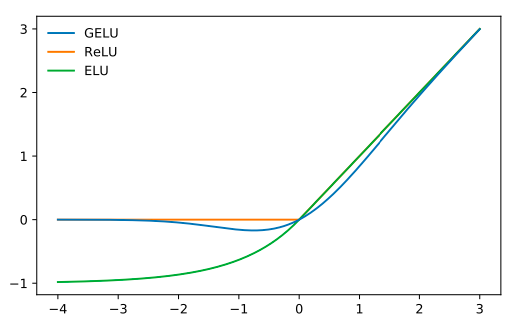 <br>
    

#### 2. BERT의 학습 
BERT는 양방향(Bi-direction)을 강조한 모델이다. BERT는 그럼 어떻게 학습을 하는 것일까? 두가지 핵심 아이디어가 있다. <br>
<b>1) Masked LM(MLM)</b>
다음 단어를 예측해야만 하는 일반적인 LM은 그 task의 특성상 한 방향(uni-direction)일 수밖에 없다. 이와 달리, BERT는 마스크 된 토큰([MASK])만 맞추면 되는 masked LM(MLM)을 제안했다. 즉, input sequence의 순서에 상관없이 전체 문장을 모두 볼 수 있게 되는 거다. (word2vec의 CBOW와 비슷한 아이디어처럼 보인다.) MLM을 위해서 BERT는 학습 데이터의 전체에서 15%를 [MASK]토큰으로 랜덤하게 바꾼다. 여기서 재미있게도 15%에 해당하는 모든 토큰들을 마스크하는 것이 아니라 80%는 [MASK] 토큰, 10%는 무작위로 랜덤한 토큰으로 바꿔준다. 나머지 10%는 원래의 토큰을 그대로 사용한다. <br>
그 이유는 바로 finetuning에 있는데, pretrain을 끝낸 모델을 finetuning할때는 input에 [mask] 토큰이 등장하지 않기 때문이다. 아무래도 finetuning시에 [mask]토큰이 보이지 않는다면, 당연히 성능에 영향을 미치게 될 것이라고 생각한거다. 따라서 [mask]토큰이 아닌 것들도 예측을 하도록 학습하여 문장 자체에 대한 전반적인 이해(문맥에 대한 이해)를 할 수 있도록 해주는 것이다. 다시 정리하자면, 전체 학습 데이터의 토큰들 중 12%(15% 중에서는 80%)는 [mask] 토큰으로, 1.5%(15% 중에서 10%)는 무작위로 랜덤한 토큰으로 대체하고, 1.5%(15% 중에서는 10%)는 변경하지 않고 원래의 토큰을 사용하는 것이다. 
    
<b> 2)Next Sentence Prediction (NSP) </b><br>
BERT는 마스크 된 토큰을 맞추는 것과 동시에 또 다른 task를 함께 학습한다. 바로 Next Sentence Prediction (NSP), 다음 문장인지 확인하기 이다. 예를 들면, 
ex) 여름이 마지막 해수욕 누가 제일 늦게 바다에서 나왔나 / 
    그 사람이 바다의 뚜껑 닫지 않고 돌아가 / 
    그때부터 바다의 뚜껑 열린 채 그대로 있네 
             -하라 마스비 ◣바다의 뚜껑◥ 중

한 행을 하나의 sentence라고 가정해 보자. 그렇다면 '여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나' 다음의 sentence는 '그 사람이 바다의 뚜껑 닫지 않고 돌아가기가 될 것이다. BERT는 이처럼 sentence가 연속해서 오는지의 여부를 학습하게 된다. <br>
[cls] 여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나 [sep] 그사람이 바다의 뚜껑 닫지 않고 돌아가 [sep] -> TRUE(IsNext) <br>
[cls] 여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나 [sep] 한강에서 자전거 타며 아이스 아메리카노를 마시고 싶다 [sep] -> FALSE(NotNext) <br>

NSP를 위해서 BERT의 학습 데이터는 1건당 두 개의 문장으로 구성한다. 50%의 확률로 TRUE와 FALSE를 부여하도록 만들다. 또한, task가 너무 쉬워지는 것을 방지하기 위해 max_num_tokens라는 것을 정의한다. 데이터의 90%는 max_num_tokens가 max_sequence_length가 같도록 만들고, 나머지 10%의 데이터는 max_num_tokens가 max_sequencee_length보다 짧게 되도록 랜덤으로 정한다. <br>
    
이후, 2개의 sentence의 단어 총수가 max_num_tokens보다 작아질때까지 2 sentence중 단어 수가 많은 쪽의 문장 맨 앞 또는 맨 뒤 단어를 하나씩 제거한다. 이때 문장 맨 앞의 단어를 선택할지 맨뒤의 단어늬 선택할지는 50%의 확률로 정한다. 이렇게 NSP를 학습하게 되면, 문장과 문장 사이의 관계를 학습할 수 있게 된다. 문자으이 길이를 임의적으로 조정하면서, 짧은 문장에 대해서도 성능이 크게 떨어지지 않게 되며, 문장의 단어들을 랜덤하게 삭제하는 과정에서 문장에서 일부 단어들이 없어져도 그 영향을 크게 받지 않게 된다. 지금까지 본 MLM과 NSP느 따로 학습되는 것이 아니라 동시에 이뤄진다. 따라서 실제 BERT의 학습 데이터셋은 아래와 같은 구조일 것이다. (편의상 토큰을 띄어쓰기 단위로 나누겠다) <br>
[cls] 여름의 마지막 [MASK] 가 제일 늦게 [MASK] 나왔나 [sep] 그 람이 바다의 [MASK] 닫지 않고 돌아가 [sep] -> Label:TRUE(IsNext) <br>
[cls] 여름의 [MASK] 해수욕 누가 제일 늦게 바다에서 나왔나 [sep] 한강에서 [MASK] 아이스 아메리카노를 마시고 싶다 [sep] -> Label: FALSE(NotNext) <br>
    
#### 3. Fine-tuning Task
BERT의 finetunint은 어떻게 진행할까?
BERT 또한 한 모델이 다양한 task들을 수행하기 때문에 input transformation을 이용한다. 
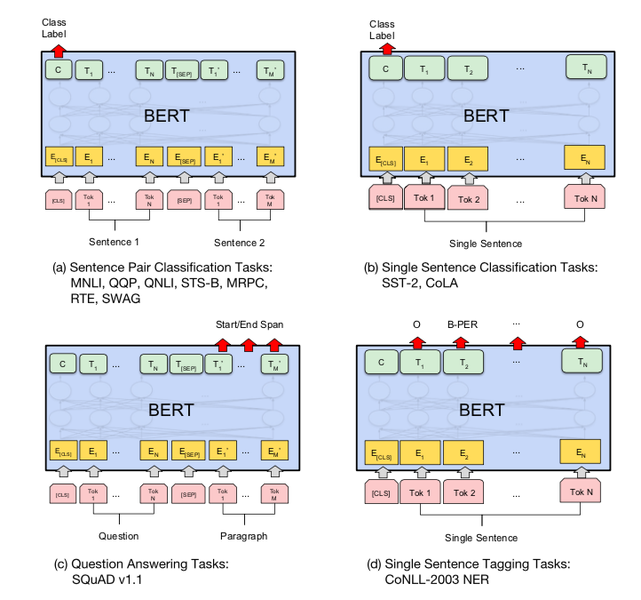 <br>

classification같은 경우는 [cls]토큰을, QA와 같이 문장이나 단어들이 나와야 하는 경우에는 토큰들의 벡터를 output laye4r에 넣어 output을 산출해낸다. <br><br>
    
    
#### 4. BERT의 모델 코드
메인 모델 구조인 TFBertEncoder안에 반복적으로 사용되고 있는 TFBertLayer 구성을 사제히 살펴보ㅏ야함. 

In [ ]:
class TFBertPreTrainingLoss:
    """
    BERT의 경우 Pretraining으로 NSP + MLM 두 가지를 함께 학습하게 됨. 그것을 위한 loss 
		-100으로 label(logit)이 되어있는 경우 loss 계산 시 제외
    """

    def compute_loss(self, labels, logits):
        loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
            from_logits=True, reduction=tf.keras.losses.Reduction.NONE
        )

        masked_lm_active_loss = tf.not_equal(tf.reshape(labels["labels"], (-1,)), -100)
        masked_lm_reduced_logits = tf.boolean_mask(
            tf.reshape(logits[0], (-1, shape_list(logits[0])[2])),
            masked_lm_active_loss,
        )
        masked_lm_labels = tf.boolean_mask(tf.reshape(labels["labels"], (-1,)), masked_lm_active_loss)
        next_sentence_active_loss = tf.not_equal(tf.reshape(labels["next_sentence_label"], (-1,)), -100)
        next_sentence_reduced_logits = tf.boolean_mask(tf.reshape(logits[1], (-1, 2)), next_sentence_active_loss)
        next_sentence_label = tf.boolean_mask(
            tf.reshape(labels["next_sentence_label"], (-1,)), mask=next_sentence_active_loss
        )
        masked_lm_loss = loss_fn(masked_lm_labels, masked_lm_reduced_logits)
        next_sentence_loss = loss_fn(next_sentence_label, next_sentence_reduced_logits)
        masked_lm_loss = tf.reshape(masked_lm_loss, (-1, shape_list(next_sentence_loss)[0]))
        masked_lm_loss = tf.reduce_mean(masked_lm_loss, 0)

        return masked_lm_loss + next_sentence_loss


class TFBertEmbeddings(tf.keras.layers.Layer):
    """
		1-1)에 해당하는 부분으로 3가지 embedding을 만들고 그 embedding을 모두 합산하여 layer normalize와 dropout을 적용
		"""


    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.vocab_size = config.vocab_size
        self.hidden_size = config.hidden_size
        self.initializer_range = config.initializer_range
        self.position_embeddings = tf.keras.layers.Embedding(
            config.max_position_embeddings,
            config.hidden_size,
            embeddings_initializer=get_initializer(self.initializer_range),
            name="position_embeddings",
        )
        self.token_type_embeddings = tf.keras.layers.Embedding(
            config.type_vocab_size,
            config.hidden_size,
            embeddings_initializer=get_initializer(self.initializer_range),
            name="token_type_embeddings",
        )

        self.LayerNorm = tf.keras.layers.LayerNormalization(epsilon=config.layer_norm_eps, name="LayerNorm")
        self.dropout = tf.keras.layers.Dropout(config.hidden_dropout_prob)

    def build(self, input_shape):
        """shared word embedding layer """
        with tf.name_scope("word_embeddings"):
            # Create and initialize weights. The random normal initializer was chosen
            # arbitrarily, and works well.
            self.word_embeddings = self.add_weight(
                "weight",
                shape=[self.vocab_size, self.hidden_size],
                initializer=get_initializer(self.initializer_range),
            )

        super().build(input_shape)

    def call(
        self,
        input_ids=None,
        position_ids=None,
        token_type_ids=None,
        inputs_embeds=None,
        mode="embedding",
        training=False,
    ):
        """
        input의 token embeddings
        Args:
            inputs: int64 tensors (shape [batch_size, length]) 3개를 담은 리스트: (input_ids, position_ids, token_type_ids)
            mode: "embedding" | "linear"
        Returns:
            outputs: mode == "embedding"; output embedding tensor(float32, shape [batch_size, length, embedding_size])
										 mode == "linear", output linear tensor(float32, shape [batch_size, length, vocab_size])
        Raises:
            ValueError: if mode is not valid.
				"""

        if mode == "embedding":
            return self._embedding(input_ids, position_ids, token_type_ids, inputs_embeds, training=training)
        elif mode == "linear":
            return self._linear(input_ids)
        else:
            raise ValueError("mode {} is not valid.".format(mode))

    def _embedding(self, input_ids, position_ids, token_type_ids, inputs_embeds, training=False):
        """input tensor에 기반하여 임베딩 적용"""
        assert not (input_ids is None and inputs_embeds is None)

        if input_ids is not None:
            input_shape = shape_list(input_ids)
        else:
            input_shape = shape_list(inputs_embeds)[:-1]

        seq_length = input_shape[1]

        if position_ids is None:
            position_ids = tf.range(seq_length, dtype=tf.int32)[tf.newaxis, :]

        if token_type_ids is None:
            token_type_ids = tf.fill(input_shape, 0)

        if inputs_embeds is None:
            inputs_embeds = tf.gather(self.word_embeddings, input_ids)

        position_embeddings = tf.cast(self.position_embeddings(position_ids), inputs_embeds.dtype)
        token_type_embeddings = tf.cast(self.token_type_embeddings(token_type_ids), inputs_embeds.dtype)
        embeddings = inputs_embeds + position_embeddings + token_type_embeddings
        embeddings = self.LayerNorm(embeddings)
        embeddings = self.dropout(embeddings, training=training)

        return embeddings

    def _linear(self, inputs):
        """
 			  linear layer를 통해서 input의 logit을 계산
        Args:
            inputs: float32 tensor (shape [batch_size, length, hidden_size])
        Returns:
            float32 tensor (shape [batch_size, length, vocab_size])
        """
        batch_size = shape_list(inputs)[0]
        length = shape_list(inputs)[1]
        x = tf.reshape(inputs, [-1, self.hidden_size])
        logits = tf.matmul(x, self.word_embeddings, transpose_b=True)

        return tf.reshape(logits, [batch_size, length, self.vocab_size])


class TFBertSelfAttention(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        if config.hidden_size % config.num_attention_heads != 0:
            raise ValueError(
                "The hidden size (%d) is not a multiple of the number of attention "
                "heads (%d)" % (config.hidden_size, config.num_attention_heads)
            )

        self.num_attention_heads = config.num_attention_heads
        assert config.hidden_size % config.num_attention_heads == 0
        self.attention_head_size = int(config.hidden_size / config.num_attention_heads)
        self.all_head_size = self.num_attention_heads * self.attention_head_size
        self.query = tf.keras.layers.Dense(
            self.all_head_size, kernel_initializer=get_initializer(config.initializer_range), name="query"
        )
        self.key = tf.keras.layers.Dense(
            self.all_head_size, kernel_initializer=get_initializer(config.initializer_range), name="key"
        )
        self.value = tf.keras.layers.Dense(
            self.all_head_size, kernel_initializer=get_initializer(config.initializer_range), name="value"
        )
        self.dropout = tf.keras.layers.Dropout(config.attention_probs_dropout_prob)

    def transpose_for_scores(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_attention_heads, self.attention_head_size))

        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, hidden_states, attention_mask, head_mask, output_attentions, training=False):
        batch_size = shape_list(hidden_states)[0]
        mixed_query_layer = self.query(hidden_states)
        mixed_key_layer = self.key(hidden_states)
        mixed_value_layer = self.value(hidden_states)
        query_layer = self.transpose_for_scores(mixed_query_layer, batch_size)
        key_layer = self.transpose_for_scores(mixed_key_layer, batch_size)
        value_layer = self.transpose_for_scores(mixed_value_layer, batch_size)

        # "query"와 "key"의 dot product : raw attention scores
        attention_scores = tf.matmul(
            query_layer, key_layer, transpose_b=True
        )  # (batch size, num_heads, seq_len_q, seq_len_k)
        dk = tf.cast(shape_list(key_layer)[-1], attention_scores.dtype)  # scale attention_scores
        attention_scores = attention_scores / tf.math.sqrt(dk)

        if attention_mask is not None:
            attention_scores = attention_scores + attention_mask

        # Normalize the attention scores to probabilities.
        attention_probs = tf.nn.softmax(attention_scores, axis=-1)

        attention_probs = self.dropout(attention_probs, training=training)

        if head_mask is not None:
            attention_probs = attention_probs * head_mask

        context_layer = tf.matmul(attention_probs, value_layer)
        context_layer = tf.transpose(context_layer, perm=[0, 2, 1, 3])
        context_layer = tf.reshape(
            context_layer, (batch_size, -1, self.all_head_size)
        )  # (batch_size, seq_len_q, all_head_size)
        outputs = (context_layer, attention_probs) if output_attentions else (context_layer,)

        return outputs


class TFBertSelfOutput(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.dense = tf.keras.layers.Dense(
            config.hidden_size, kernel_initializer=get_initializer(config.initializer_range), name="dense"
        )
        self.LayerNorm = tf.keras.layers.LayerNormalization(epsilon=config.layer_norm_eps, name="LayerNorm")
        self.dropout = tf.keras.layers.Dropout(config.hidden_dropout_prob)

    def call(self, hidden_states, input_tensor, training=False):
        hidden_states = self.dense(hidden_states)
        hidden_states = self.dropout(hidden_states, training=training)
        hidden_states = self.LayerNorm(hidden_states + input_tensor)

        return hidden_states


class TFBertAttention(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.self_attention = TFBertSelfAttention(config, name="self")
        self.dense_output = TFBertSelfOutput(config, name="output")

    def prune_heads(self, heads):
        raise NotImplementedError

    def call(self, input_tensor, attention_mask, head_mask, output_attentions, training=False):
        self_outputs = self.self_attention(
            input_tensor, attention_mask, head_mask, output_attentions, training=training
        )
        attention_output = self.dense_output(self_outputs[0], input_tensor, training=training)
        outputs = (attention_output,) + self_outputs[1:]  # add attentions if we output them

        return outputs


class TFBertIntermediate(tf.keras.layers.Layer):
"""
Transformer Block에서의 feedforward
"""
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.dense = tf.keras.layers.Dense(
            config.intermediate_size, kernel_initializer=get_initializer(config.initializer_range), name="dense"
        )

        if isinstance(config.hidden_act, str):
            self.intermediate_act_fn = get_tf_activation(config.hidden_act)
        else:
            self.intermediate_act_fn = config.hidden_act

    def call(self, hidden_states):
        hidden_states = self.dense(hidden_states)
        hidden_states = self.intermediate_act_fn(hidden_states)

        return hidden_states


class TFBertOutput(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.dense = tf.keras.layers.Dense(
            config.hidden_size, kernel_initializer=get_initializer(config.initializer_range), name="dense"
        )
        self.LayerNorm = tf.keras.layers.LayerNormalization(epsilon=config.layer_norm_eps, name="LayerNorm")
        self.dropout = tf.keras.layers.Dropout(config.hidden_dropout_prob)

    def call(self, hidden_states, input_tensor, training=False):
        hidden_states = self.dense(hidden_states)
        hidden_states = self.dropout(hidden_states, training=training)
        hidden_states = self.LayerNorm(hidden_states + input_tensor)

        return hidden_states


class TFBertLayer(tf.keras.layers.Layer):
"""
Transformer Encoder Block과 동일한 구조 : Attention,Feedforward,dropout,layer nomalization
"""
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.attention = TFBertAttention(config, name="attention")
        self.intermediate = TFBertIntermediate(config, name="intermediate")
        self.bert_output = TFBertOutput(config, name="output")

    def call(self, hidden_states, attention_mask, head_mask, output_attentions, training=False):
        attention_outputs = self.attention(
            hidden_states, attention_mask, head_mask, output_attentions, training=training
        )
        attention_output = attention_outputs[0]
        intermediate_output = self.intermediate(attention_output)
        layer_output = self.bert_output(intermediate_output, attention_output, training=training)
        outputs = (layer_output,) + attention_outputs[1:]  # add attentions if we output them

        return outputs


class TFBertEncoder(tf.keras.layers.Layer):
"""
Transformer Encoder Block(코드 상에서 TFBertLayer)를 n_layer만큼 여러개 쌓은 구조
"""
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.layer = [TFBertLayer(config, name="layer_._{}".format(i)) for i in range(config.num_hidden_layers)]

    def call(
        self,
        hidden_states,
        attention_mask,
        head_mask,
        output_attentions,
        output_hidden_states,
        return_dict,
        training=False,
    ):
        all_hidden_states = () if output_hidden_states else None
        all_attentions = () if output_attentions else None

        for i, layer_module in enumerate(self.layer):
            if output_hidden_states:
                all_hidden_states = all_hidden_states + (hidden_states,)

            layer_outputs = layer_module(
                hidden_states, attention_mask, head_mask[i], output_attentions, training=training
            )
            hidden_states = layer_outputs[0]

            if output_attentions:
                all_attentions = all_attentions + (layer_outputs[1],)

        # Add last layer
        if output_hidden_states:
            all_hidden_states = all_hidden_states + (hidden_states,)

        if not return_dict:
            return tuple(v for v in [hidden_states, all_hidden_states, all_attentions] if v is not None)

        return TFBaseModelOutput(
            last_hidden_state=hidden_states, hidden_states=all_hidden_states, attentions=all_attentions
        )


class TFBertPooler(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.dense = tf.keras.layers.Dense(
            config.hidden_size,
            kernel_initializer=get_initializer(config.initializer_range),
            activation="tanh",
            name="dense",
        )

    def call(self, hidden_states):
        # 첫 번째 토큰의 hidden state를 얻기 위해 pool
        first_token_tensor = hidden_states[:, 0]
        pooled_output = self.dense(first_token_tensor)

        return pooled_output


class TFBertPredictionHeadTransform(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.dense = tf.keras.layers.Dense(
            config.hidden_size, kernel_initializer=get_initializer(config.initializer_range), name="dense"
        )

        if isinstance(config.hidden_act, str):
            self.transform_act_fn = get_tf_activation(config.hidden_act)
        else:
            self.transform_act_fn = config.hidden_act

        self.LayerNorm = tf.keras.layers.LayerNormalization(epsilon=config.layer_norm_eps, name="LayerNorm")

    def call(self, hidden_states):
        hidden_states = self.dense(hidden_states)
        hidden_states = self.transform_act_fn(hidden_states)
        hidden_states = self.LayerNorm(hidden_states)

        return hidden_states


class TFBertLMPredictionHead(tf.keras.layers.Layer):
    def __init__(self, config, input_embeddings, **kwargs):
        super().__init__(**kwargs)

        self.vocab_size = config.vocab_size
        self.transform = TFBertPredictionHeadTransform(config, name="transform")

        # input embeddings과 동일한 weight를 가지고 있지만 각각의 token에 대하여 output만 바이어스를 가지고 있음
        self.input_embeddings = input_embeddings

    def build(self, input_shape):
        self.bias = self.add_weight(shape=(self.vocab_size,), initializer="zeros", trainable=True, name="bias")

        super().build(input_shape)

    def call(self, hidden_states):
        hidden_states = self.transform(hidden_states)
        hidden_states = self.input_embeddings(hidden_states, mode="linear")
        hidden_states = hidden_states + self.bias

        return hidden_states


class TFBertMLMHead(tf.keras.layers.Layer):
"""
2-1)Masked LM을 위한 class
"""
    def __init__(self, config, input_embeddings, **kwargs):
        super().__init__(**kwargs)

        self.predictions = TFBertLMPredictionHead(config, input_embeddings, name="predictions")

    def call(self, sequence_output):
        prediction_scores = self.predictions(sequence_output)

        return prediction_scores


class TFBertNSPHead(tf.keras.layers.Layer):
"""
2-2)NSP를 위한 class
"""
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.seq_relationship = tf.keras.layers.Dense(
            2, kernel_initializer=get_initializer(config.initializer_range), name="seq_relationship"
        )

    def call(self, pooled_output):
        seq_relationship_score = self.seq_relationship(pooled_output)

        return seq_relationship_score


@keras_serializable
class TFBertMainLayer(tf.keras.layers.Layer):
"""
모델의 전체 구조
"""
    config_class = BertConfig

    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.num_hidden_layers = config.num_hidden_layers
        self.initializer_range = config.initializer_range
        self.output_attentions = config.output_attentions
        self.output_hidden_states = config.output_hidden_states
        self.return_dict = config.use_return_dict
        self.embeddings = TFBertEmbeddings(config, name="embeddings")
        self.encoder = TFBertEncoder(config, name="encoder")
        self.pooler = TFBertPooler(config, name="pooler")

    def get_input_embeddings(self):
        return self.embeddings

    def set_input_embeddings(self, value):
        self.embeddings.word_embeddings = value
        self.embeddings.vocab_size = value.shape[0]

    def _prune_heads(self, heads_to_prune):
        """
        heads_to_prune: dict of {layer_num: list of heads to prune in this layer}
        """
        raise NotImplementedError

    def call(
        self,
        inputs,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
        training=False,
    ):
        if isinstance(inputs, (tuple, list)):
            input_ids = inputs[0]
            attention_mask = inputs[1] if len(inputs) > 1 else attention_mask
            token_type_ids = inputs[2] if len(inputs) > 2 else token_type_ids
            position_ids = inputs[3] if len(inputs) > 3 else position_ids
            head_mask = inputs[4] if len(inputs) > 4 else head_mask
            inputs_embeds = inputs[5] if len(inputs) > 5 else inputs_embeds
            output_attentions = inputs[6] if len(inputs) > 6 else output_attentions
            output_hidden_states = inputs[7] if len(inputs) > 7 else output_hidden_states
            return_dict = inputs[8] if len(inputs) > 8 else return_dict
            assert len(inputs) <= 9, "Too many inputs."
        elif isinstance(inputs, (dict, BatchEncoding)):
            input_ids = inputs.get("input_ids")
            attention_mask = inputs.get("attention_mask", attention_mask)
            token_type_ids = inputs.get("token_type_ids", token_type_ids)
            position_ids = inputs.get("position_ids", position_ids)
            head_mask = inputs.get("head_mask", head_mask)
            inputs_embeds = inputs.get("inputs_embeds", inputs_embeds)
            output_attentions = inputs.get("output_attentions", output_attentions)
            output_hidden_states = inputs.get("output_hidden_states", output_hidden_states)
            return_dict = inputs.get("return_dict", return_dict)
            assert len(inputs) <= 9, "Too many inputs."
        else:
            input_ids = inputs

        output_attentions = output_attentions if output_attentions is not None else self.output_attentions
        output_hidden_states = output_hidden_states if output_hidden_states is not None else self.output_hidden_states
        return_dict = return_dict if return_dict is not None else self.return_dict

        if input_ids is not None and inputs_embeds is not None:
            raise ValueError("You cannot specify both input_ids and inputs_embeds at the same time")
        elif input_ids is not None:
            input_shape = shape_list(input_ids)
        elif inputs_embeds is not None:
            input_shape = shape_list(inputs_embeds)[:-1]
        else:
            raise ValueError("You have to specify either input_ids or inputs_embeds")

        if attention_mask is None:
            attention_mask = tf.fill(input_shape, 1)

        if token_type_ids is None:
            token_type_ids = tf.fill(input_shape, 0)

        embedding_output = self.embeddings(input_ids, position_ids, token_type_ids, inputs_embeds, training=training)

				# 3D attention mask 만들기
        # Sizes : [batch_size, 1, 1, to_seq_length]
        # 3D attention mask를 [batch_size, num_heads, from_seq_length, to_seq_length]로 브로드캐스팅

        extended_attention_mask = attention_mask[:, tf.newaxis, tf.newaxis, :]

				# attention_mask가 1.0이면 포함, 0.0이면 미포함 하여 attention 계산
        extended_attention_mask = tf.cast(extended_attention_mask, embedding_output.dtype)
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0

        # head_mask가 1.0이면, head를 유지
        # attention_probs : shape bsz x n_heads x N x N
        # input head_mask : shape [num_heads] 또는 [num_hidden_layers x num_heads]
        # head_mask : shape [num_hidden_layers x batch x num_heads x seq_length x seq_length
        if head_mask is not None:
            raise NotImplementedError
        else:
            head_mask = [None] * self.num_hidden_layers
            # head_mask = tf.constant([0] * self.num_hidden_layers)

        encoder_outputs = self.encoder(
            embedding_output,
            extended_attention_mask,
            head_mask,
            output_attentions,
            output_hidden_states,
            return_dict,
            training=training,
        )

        sequence_output = encoder_outputs[0]
        pooled_output = self.pooler(sequence_output)

        if not return_dict:
            return (
                sequence_output,
                pooled_output,
            ) + encoder_outputs[1:]

        return TFBaseModelOutputWithPooling(
            last_hidden_state=sequence_output,
            pooler_output=pooled_output,
            hidden_states=encoder_outputs.hidden_states,
            attentions=encoder_outputs.attentions,
        )

BERT의 논문을 직접 읽어보자. https://arxiv.org/abs/1810.04805 <br>
이후엔 트랜스포머가 보에스인 모델의 한게점을 어떻게 극복해나가는가에 초점이 있다. 성능이 잘 나오긴 하지만 사실 GPT, BERT와 같은 모델들은 어마어마한 학습 시간과 컴퓨팅 파워가 있어야 가능한 모델들이다. <br><br>


### 19-6 Transformer-XL (Transformer Extra Long)
transformer-XL은 기존의 언어 모델과 트랜스포머가 가지고 있던 한계점인 <b>context를 반영하기</b> 개선한 모델이다. 비교적 짧은 문장에서의 context는 잘 학습했는데, sequence가 길어질수록 그 상관관계(long-term dependency)가 점점 떨어진다는 것이 문제였다. 주제에 대해서 잘 말하다가 갑자기 다른 얘기를 한다던가 하는 문제 등. 

#### transformer-XL의 구조
1. Vanilla Transformer LMs
트랜스포머는 max_seq_length가 정해져 있다. 즉, 모델이 감당할 수 있을 만큼 텍스트를 잘라서 학습하고, 학습한 이후부터 다시 일정 길이만큼 잘라서 학습을 하게 된다. 이때, 이전 segment에서 학습했던 context는 무시되고, 지금 학습을 하고 있는 segment 안에서만 context를 고려하게 된다. 다시 말해서 분명 사람이 볼 때는 이어지는 흐름인데 segment1과 segment2는 전혀 공유하는 context가 없이 단절되었다 (context fragmentation)는 뜻이다. 
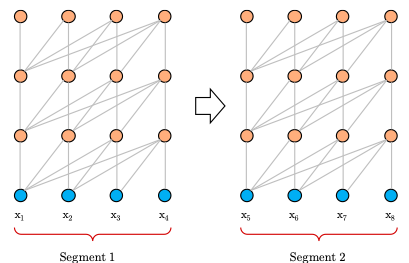 <br>

테스트 시 또 다른 문제가 등장하게 된다. 바로 슬라이딩을 하면서 생기는 문제이다. 모델은 일정 길이의 context를 보고 한 단어를 예측한다. 그 다음에 딱 한 개만큼만 슬라이딩하여 새로운 context를 만들고 다시 연산하여 하나의 단어를 예측한다. 이렇게 하면 이전 context를 조금씩이나마 유지할 수 있을지 모르지만 연산에 드는 비용이 엄청나겠죠?
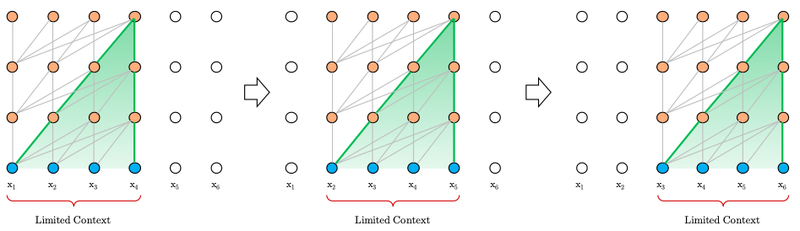 <br>

2. Segment-level recurrence with state reuse
이러한 문제들을 해결하기 위해 저자들은 recurrence 메커니즘을 도입한다. 학습 시에 이전 segment에서 계산했었던 hidden state를 사용하는 것이다. 이를 통해 context fragmentation을 해결하고 long-term dependency를 유지할 수 있게 된다. RNN의 원리를 떠올리면 쉽게 와닿을 것이다. 그러나 RNN과는 달리, transformer-XL은 다음 layer의 hidden state를 재사용하게 된다. 
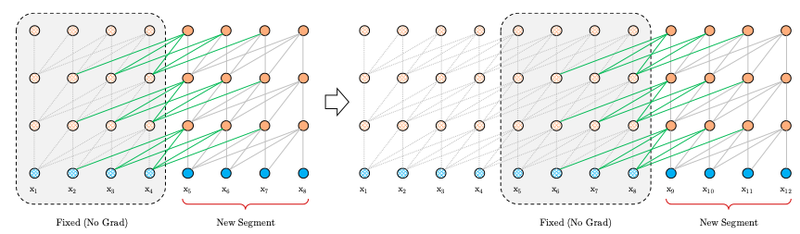 <br>

<b> Q. Transformer은 파라미터 수가 압도적으로 많은데, 이전 layer의 hidden state를 재숑할 경우 메모리 부하는 어떻게 감당하나요? </b>
이때 이전 segment들의 정보를 가진 hidden state들의 gradient는 더 이상 변하지 않도록 고정을 시킨다 (메모리에 있던 값을 불러온다고 하여 cache라고 부르기도 한다).

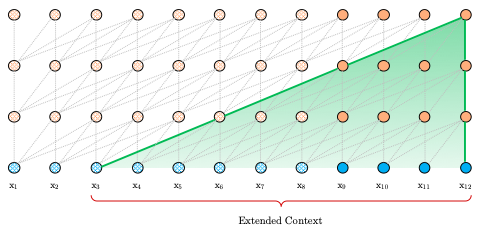 <br>
트랜스포머 구조의 LM이 테스트 시 가지고 있던 문제도 recurrence 메커니즘을 이용하면 쉽게 해결할 수 있다. 이미 계산한 hidden state의 정보를 메모리에 가지고 있다가 cache를 하기 때문에 계속해서 반복하여 똑같은 연산을 할 필요가 없어진다. 이 덕분에 속도도 더욱 빨라질 수 있다.

3. Relative Positional Encodings
트랜스포머에 segment-level의 recurrence 메커니즘을 적용하면 한 가지 문제가 발생한다. 바로 포지션 정보를 어떻게 추가할 것인가에 대한 문제이죠. 기존 트랜스포머의 포지션 인코딩은 각 segment 내에서의 절대적인 위치 정보를 인코딩하게 된다.

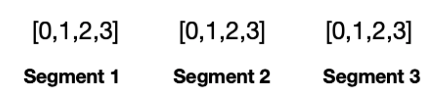<br> 
그러나 recurrence 메커니즘을 사용하게 되면 segment들 사이에서의 상대적인 위치 정보가 필요하다. 이를 위해 저자들은 상대적인 포지션 인코딩(Relative Positional Encodings) 방법을 제안한다. 수식 때문에 조금 복잡해 보일 수도 있지만, 기억하실 것은 상대적인 정보를 임베딩 레이어가 아닌 attention 연산 시에 주입한다는 것이다.

1) 트랜스포머의 attention 연산<br>
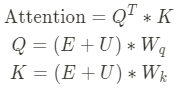 <br>
트랜스포머의 attention 연산을 수식으로 나타내면 위와 같다. 여기서 E는 토큰 임베딩, U는 포지션 인코딩을 의미하죠. attention 연산에 Q와 K를 대입하면 아래와 같은 식이 된다.
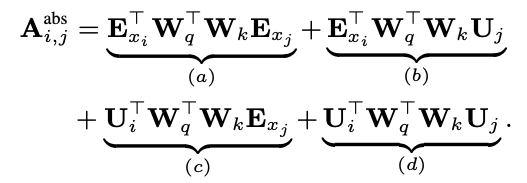 <br>

U에 인코딩된, i,j번째 포지션의 정보를 가지고 연산을 한다. 그러나 위에서 언급했듯이 이제는 상대적인 위치 정보가 필요하다. i=1, j=2이든 i=7, j=8이든 상관없이 j가 i보다 1뒤에 있다정도만 알면 됨.
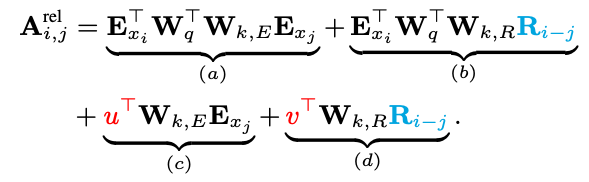 <br>

이를 위해 U 대신 R을 사용합니다. R은 상대적인 포지션 정보를 encoding한 매트릭스이다. R의 i번째 행은 i와 다른 단어들 간의 상대적인 포지션을 알려주죠. 따라서, 아래 첨자 i−j에서 보이듯이, i와 j의 상대적인 거리를 이용하고 있다. 여기서 R은 기존의 트랜스포머와 마찬가지로 학습되는 것이 아닌 sinusoid encoding matrix를 사용한다. 또한, 학습 가능한 파라미터로 벡터 u와 v가 추가되었다. 기존 트랜스포머는 query의 위치에 따라 그 query vector가 영향을 받았습니다. 그러나 절대적인 포지션이 아닌 상대적인 포지션 정보를 이용하게 되면서 query는 그 위치에 상관없이 똑같은 query vector를 사용하게 됩니다. 따라서 포지션에 상관없이 같은 값인 벡터 u와 v로 대신하게 되었다. 마지막으로, content-based key vectors와 location-based key vectors를 독립적으로 만들기 위해 $W_k,E$ 와 $W_k,R$를 분리했다. 이렇게 recurrence 메커니즘과 relative position encoding을 통해 transformer-XL은 auxiliary losses 없이도 뛰어난 성능을 낼 수 있었다고 말한다. <br>

4. 그렇다면 Transformer-XL의 모델 부분을 코드로 한 번 확인해 볼까요? <br>
TFTransfoXLMainLayer이라는 메인 클래스 안에서 Transformer-XL의 주요 특징인 State Reuse를 위한 메모리 관리가 구현된 _ update_mems() 메소드, 그리고 TFRelPartialLearnableMultiHeadAttn 레이어에 구현된 Relative attention이 TFRelPartialLearnableDecoderLayer 안에서 어떻게 recurrent하게 사용되는지를 눈여겨 봐야함. 

In [ ]:
class TFPositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, demb, **kwargs):
        super().__init__(**kwargs)

        self.inv_freq = 1 / (10000 ** (tf.range(0, demb, 2.0) / demb))

    def call(self, pos_seq, bsz=None):
        sinusoid_inp = tf.einsum("i,j->ij", pos_seq, self.inv_freq)
        pos_emb = tf.concat([tf.sin(sinusoid_inp), tf.cos(sinusoid_inp)], -1)

        if bsz is not None:
            return tf.tile(pos_emb[:, None, :], [1, bsz, 1])
        else:
            return pos_emb[:, None, :]


class TFPositionwiseFF(tf.keras.layers.Layer):
    def __init__(self, d_model, d_inner, dropout, pre_lnorm=False, layer_norm_epsilon=1e-5, init_std=0.02, **kwargs):
        super().__init__(**kwargs)

        self.d_model = d_model
        self.d_inner = d_inner
        self.dropout = dropout

        self.layer_1 = tf.keras.layers.Dense(
            d_inner, kernel_initializer=get_initializer(init_std), activation=tf.nn.relu, name="CoreNet_._0"
        )
        self.drop_1 = tf.keras.layers.Dropout(dropout)
        self.layer_2 = tf.keras.layers.Dense(d_model, kernel_initializer=get_initializer(init_std), name="CoreNet_._3")
        self.drop_2 = tf.keras.layers.Dropout(dropout)

        self.layer_norm = tf.keras.layers.LayerNormalization(epsilon=layer_norm_epsilon, name="layer_norm")

        self.pre_lnorm = pre_lnorm

    def call(self, inp, training=False):
        if self.pre_lnorm:
            # layer normalization + positionwise feed-forward
            core_out = self.layer_norm(inp)
            core_out = self.layer_1(core_out)
            core_out = self.drop_1(core_out, training=training)
            core_out = self.layer_2(core_out)
            core_out = self.drop_2(core_out, training=training)

            # residual connection
            output = core_out + inp
        else:
            # positionwise feed-forward
            core_out = self.layer_1(inp)
            core_out = self.drop_1(core_out, training=training)
            core_out = self.layer_2(core_out)
            core_out = self.drop_2(core_out, training=training)

            # residual connection + layer normalization
            output = self.layer_norm(inp + core_out)

        return output


class TFRelPartialLearnableMultiHeadAttn(tf.keras.layers.Layer):
    def __init__(
        self,
        n_head,
        d_model,
        d_head,
        dropout,
        dropatt=0.0,
        pre_lnorm=False,
        r_r_bias=None,
        r_w_bias=None,
        layer_norm_epsilon=1e-5,
        init_std=0.02,
        output_attentions=False,
        **kwargs
    ):
        super().__init__(**kwargs)

        self.n_head = n_head
        self.d_model = d_model
        self.d_head = d_head
        self.dropout = dropout
        self.output_attentions = output_attentions

        self.qkv_net = tf.keras.layers.Dense(
            3 * n_head * d_head, kernel_initializer=get_initializer(init_std), use_bias=False, name="qkv_net"
        )

        self.drop = tf.keras.layers.Dropout(dropout)
        self.dropatt = tf.keras.layers.Dropout(dropatt)
        self.o_net = tf.keras.layers.Dense(
            d_model, kernel_initializer=get_initializer(init_std), use_bias=False, name="o_net"
        )

        self.layer_norm = tf.keras.layers.LayerNormalization(epsilon=layer_norm_epsilon, name="layer_norm")

        self.scale = 1 / (d_head ** 0.5)

        self.pre_lnorm = pre_lnorm

        if r_r_bias is not None and r_w_bias is not None:  # Biases are shared
            self.r_r_bias = r_r_bias
            self.r_w_bias = r_w_bias
        else:
            self.r_r_bias = None
            self.r_w_bias = None

        self.r_net = tf.keras.layers.Dense(
            self.n_head * self.d_head, kernel_initializer=get_initializer(init_std), use_bias=False, name="r_net"
        )

    def build(self, input_shape):
        if self.r_r_bias is None or self.r_w_bias is None:  # Biases are not shared
            self.r_r_bias = self.add_weight(
                shape=(self.n_head, self.d_head), initializer="zeros", trainable=True, name="r_r_bias"
            )
            self.r_w_bias = self.add_weight(
                shape=(self.n_head, self.d_head), initializer="zeros", trainable=True, name="r_w_bias"
            )
        super().build(input_shape)

    def _rel_shift(self, x):
		"""
		relative attention을 수행하기 위한 masking
		"""

        x_size = shape_list(x)

        x = tf.pad(x, [[0, 0], [1, 0], [0, 0], [0, 0]])
        x = tf.reshape(x, [x_size[1] + 1, x_size[0], x_size[2], x_size[3]])
        x = tf.slice(x, [1, 0, 0, 0], [-1, -1, -1, -1])
        x = tf.reshape(x, x_size)

        return x

    def call(self, w, r, attn_mask, mems, head_mask, output_attentions, training=False):
        """
				w는 embedding, r은 postional embedding
				"""

				qlen, rlen, bsz = shape_list(w)[0], shape_list(r)[0], shape_list(w)[1]

        if mems is not None:
            cat = tf.concat([mems, w], 0)
            if self.pre_lnorm:
                w_heads = self.qkv_net(self.layer_norm(cat))
            else:
                w_heads = self.qkv_net(cat)
            r_head_k = self.r_net(r)

            w_head_q, w_head_k, w_head_v = tf.split(w_heads, 3, axis=-1)
            w_head_q = w_head_q[-qlen:]
        else:
            if self.pre_lnorm:
                w_heads = self.qkv_net(self.layer_norm(w))
            else:
                w_heads = self.qkv_net(w)
            r_head_k = self.r_net(r)

            w_head_q, w_head_k, w_head_v = tf.split(w_heads, 3, axis=-1)

        klen = shape_list(w_head_k)[0]

        w_head_q = tf.reshape(w_head_q, (qlen, bsz, self.n_head, self.d_head))  # qlen x bsz x n_head x d_head
        w_head_k = tf.reshape(w_head_k, (klen, bsz, self.n_head, self.d_head))  # qlen x bsz x n_head x d_head
        w_head_v = tf.reshape(w_head_v, (klen, bsz, self.n_head, self.d_head))  # qlen x bsz x n_head x d_head

        r_head_k = tf.reshape(r_head_k, (rlen, self.n_head, self.d_head))  # qlen x n_head x d_head

        # compute attention score
        rw_head_q = w_head_q + self.r_w_bias  # qlen x bsz x n_head x d_head
        AC = tf.einsum("ibnd,jbnd->ijbn", rw_head_q, w_head_k)  # qlen x klen x bsz x n_head

        rr_head_q = w_head_q + self.r_r_bias
        BD = tf.einsum("ibnd,jnd->ijbn", rr_head_q, r_head_k)  # qlen x klen x bsz x n_head
        BD = self._rel_shift(BD)

        # [qlen x klen x bsz x n_head]
        attn_score = AC + BD
        attn_score = attn_score * self.scale

        # compute attention probability
        if attn_mask is not None:
            attn_mask_t = attn_mask[:, :, None, None]
            attn_score = attn_score * (1 - attn_mask_t) - 1e30 * attn_mask_t

        # [qlen x klen x bsz x n_head]
        attn_prob = tf.nn.softmax(attn_score, axis=1)
        attn_prob = self.dropatt(attn_prob, training=training)

        if head_mask is not None:
            attn_prob = attn_prob * head_mask

        # compute attention vector
        attn_vec = tf.einsum("ijbn,jbnd->ibnd", attn_prob, w_head_v)

        # [qlen x bsz x n_head x d_head]
        attn_vec_sizes = shape_list(attn_vec)
        attn_vec = tf.reshape(attn_vec, (attn_vec_sizes[0], attn_vec_sizes[1], self.n_head * self.d_head))

        # linear projection
        attn_out = self.o_net(attn_vec)
        attn_out = self.drop(attn_out, training=training)

        if self.pre_lnorm:
            # residual connection
            outputs = [w + attn_out]
        else:
            # residual connection + layer normalization
            outputs = [self.layer_norm(w + attn_out)]

        if output_attentions:
            outputs.append(attn_prob)

        return outputs


class TFRelPartialLearnableDecoderLayer(tf.keras.layers.Layer):
    def __init__(
        self,
        n_head,
        d_model,
        d_head,
        d_inner,
        dropout,
        dropatt=0.0,
        pre_lnorm=False,
        r_w_bias=None,
        r_r_bias=None,
        layer_norm_epsilon=1e-5,
        init_std=0.02,
        output_attentions=False,
        **kwargs
    ):
        super().__init__(**kwargs)

        self.dec_attn = TFRelPartialLearnableMultiHeadAttn(
            n_head,
            d_model,
            d_head,
            dropout,
            dropatt=dropatt,
            pre_lnorm=pre_lnorm,
            r_w_bias=r_w_bias,
            r_r_bias=r_r_bias,
            init_std=init_std,
            layer_norm_epsilon=layer_norm_epsilon,
            output_attentions=output_attentions,
            name="dec_attn",
        )
        self.pos_ff = TFPositionwiseFF(
            d_model,
            d_inner,
            dropout,
            pre_lnorm=pre_lnorm,
            init_std=init_std,
            layer_norm_epsilon=layer_norm_epsilon,
            name="pos_ff",
        )

    def call(self, dec_inp, r, dec_attn_mask, mems, head_mask, output_attentions, training=False):
        attn_outputs = self.dec_attn(dec_inp, r, dec_attn_mask, mems, head_mask, output_attentions, training=training)
        ff_output = self.pos_ff(attn_outputs[0], training=training)

        outputs = [ff_output] + attn_outputs[1:]

        return outputs


class TFAdaptiveEmbedding(tf.keras.layers.Layer):
"""
n개의 token을 한 번에 임베딩하는 것이 아니라 먼저 cutoff를 통해 n개의 tokens을 나누고 mask_i = (inp_flat >= l_idx) & (inp_flat < r_idx) 을 만족하는 토큰들만을 임베딩하는 방식
"""

    def __init__(self, n_token, d_embed, d_proj, cutoffs, div_val=1, init_std=0.02, sample_softmax=False, **kwargs):
        super().__init__(**kwargs)

        self.n_token = n_token
        self.d_embed = d_embed
        self.init_std = init_std

        self.cutoffs = cutoffs + [n_token]
        self.div_val = div_val
        self.d_proj = d_proj

        self.emb_scale = d_proj ** 0.5

        self.cutoff_ends = [0] + self.cutoffs

        self.emb_layers = []
        self.emb_projs = []
        if div_val == 1:
            raise NotImplementedError  # Removed these to avoid maintaining dead code - They are not used in our pretrained checkpoint
        else:
            for i in range(len(self.cutoffs)):
                l_idx, r_idx = self.cutoff_ends[i], self.cutoff_ends[i + 1]
                d_emb_i = d_embed // (div_val ** i)
                self.emb_layers.append(
                    tf.keras.layers.Embedding(
                        r_idx - l_idx,
                        d_emb_i,
                        embeddings_initializer=get_initializer(init_std),
                        name="emb_layers_._{}".format(i),
                    )
                )

    def build(self, input_shape):
        for i in range(len(self.cutoffs)):
            d_emb_i = self.d_embed // (self.div_val ** i)
            self.emb_projs.append(
                self.add_weight(
                    shape=(d_emb_i, self.d_proj),
                    initializer=get_initializer(self.init_std),
                    trainable=True,
                    name="emb_projs_._{}".format(i),
                )
            )
        super().build(input_shape)

    def call(self, inp):
        if self.div_val == 1:
            raise NotImplementedError  # Removed these to avoid maintaining dead code - They are not used in our pretrained checkpoint
        else:
            inp_flat = tf.reshape(inp, (-1,))
            emb_flat = tf.zeros([shape_list(inp_flat)[0], self.d_proj])
            for i in range(len(self.cutoffs)):
                l_idx, r_idx = self.cutoff_ends[i], self.cutoff_ends[i + 1]

                mask_i = (inp_flat >= l_idx) & (inp_flat < r_idx)

                inp_i = tf.boolean_mask(inp_flat, mask_i) - l_idx
                emb_i = self.emb_layers[i](inp_i)
                emb_i = tf.einsum("id,de->ie", emb_i, self.emb_projs[i])

                mask_idx = tf.cast(tf.where(mask_i), dtype=tf.int64)
                emb_flat += tf.scatter_nd(mask_idx, emb_i, tf.cast(shape_list(emb_flat), dtype=tf.int64))

            embed_shape = shape_list(inp) + [self.d_proj]
            embed = tf.reshape(emb_flat, embed_shape)

        embed *= self.emb_scale

        return embed


@keras_serializable
class TFTransfoXLMainLayer(tf.keras.layers.Layer):
    config_class = TransfoXLConfig

    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)
        self.output_hidden_states = config.output_hidden_states
        self.output_attentions = config.output_attentions
        self.return_dict = config.use_return_dict

        self.n_token = config.vocab_size

        self.d_embed = config.d_embed
        self.d_model = config.d_model
        self.n_head = config.n_head
        self.d_head = config.d_head
        self.untie_r = config.untie_r

        self.word_emb = TFAdaptiveEmbedding(
            config.vocab_size,
            config.d_embed,
            config.d_model,
            config.cutoffs,
            div_val=config.div_val,
            init_std=config.init_std,
            name="word_emb",
        )

        self.drop = tf.keras.layers.Dropout(config.dropout)

        self.n_layer = config.n_layer
        self.mem_len = config.mem_len
        self.attn_type = config.attn_type

        self.layers = []
        if config.attn_type == 0:  # the default attention
            for i in range(config.n_layer):
                self.layers.append(
                    TFRelPartialLearnableDecoderLayer(
                        config.n_head,
                        config.d_model,
                        config.d_head,
                        config.d_inner,
                        config.dropout,
                        dropatt=config.dropatt,
                        pre_lnorm=config.pre_lnorm,
                        r_w_bias=None if self.untie_r else self.r_w_bias,
                        r_r_bias=None if self.untie_r else self.r_r_bias,
                        layer_norm_epsilon=config.layer_norm_epsilon,
                        init_std=config.init_std,
                        output_attentions=self.output_attentions,
                        name="layers_._{}".format(i),
                    )
                )
        else:  # learnable embeddings and absolute embeddings
            raise NotImplementedError  # Removed these to avoid maintaining dead code - They are not used in our pretrained checkpoint

        self.same_length = config.same_length
        self.clamp_len = config.clamp_len

        if self.attn_type == 0:  # default attention
            self.pos_emb = TFPositionalEmbedding(self.d_model, name="pos_emb")
        else:  # learnable embeddings and absolute embeddings
            raise NotImplementedError  # Removed these to avoid maintaining dead code - They are not used in our pretrained checkpoint

    def build(self, input_shape):
        if not self.untie_r:
            self.r_w_bias = self.add_weight(
                shape=(self.n_head, self.d_head), initializer="zeros", trainable=True, name="r_w_bias"
            )
            self.r_r_bias = self.add_weight(
                shape=(self.n_head, self.d_head), initializer="zeros", trainable=True, name="r_r_bias"
            )
        super().build(input_shape)

    def get_input_embeddings(self):
        return self.word_emb

    def set_input_embeddings(self, value):
        raise NotImplementedError

    def _resize_token_embeddings(self, new_num_tokens):
        return self.word_emb

    def backward_compatible(self):
        self.sample_softmax = -1

    def reset_memory_length(self, mem_len):
        self.mem_len = mem_len

    def _prune_heads(self, heads):
        raise NotImplementedError

    def init_mems(self, bsz):
        if self.mem_len > 0:
            mems = []
            for i in range(self.n_layer):
                empty = tf.zeros([self.mem_len, bsz, self.d_model])
                mems.append(empty)

            return mems
        else:
            return None

    def _update_mems(self, hids, mems, mlen, qlen):
		"""
		한 칸씩 슬라이딩하며, memory에 새로운 segment를 추가합니다. 이때, tf.stop_gradient를 통해 이전부터 보았던 segment는 gradient가 더 이상 흐르지 않도록 tf.stop_gradient를 사용
		"""
        if mems is None:
            return None

        # mems is not None
        assert len(hids) == len(mems), "len(hids) != len(mems)"

        # `mlen + qlen` steps
        new_mems = []
        end_idx = mlen + max(0, qlen)
        beg_idx = max(0, end_idx - self.mem_len)
        for i in range(len(hids)):

            cat = tf.concat([mems[i], hids[i]], axis=0)
            tf.stop_gradient(cat)
            new_mems.append(cat[beg_idx:end_idx])

        return new_mems

    def call(
        self,
        inputs,
        mems=None,
        head_mask=None,
        inputs_embeds=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
        training=False,
    ):
        if isinstance(inputs, (tuple, list)):
            input_ids = inputs[0]
            mems = inputs[1] if len(inputs) > 1 else mems
            head_mask = inputs[2] if len(inputs) > 2 else head_mask
            inputs_embeds = inputs[3] if len(inputs) > 3 else inputs_embeds
            output_attentions = inputs[4] if len(inputs) > 4 else output_attentions
            output_hidden_states = inputs[5] if len(inputs) > 5 else output_hidden_states
            return_dict = inputs[6] if len(inputs) > 6 else return_dict
            assert len(inputs) <= 7, "Too many inputs."
        elif isinstance(inputs, (dict, BatchEncoding)):
            input_ids = inputs.get("input_ids")
            mems = inputs.get("mems", mems)
            head_mask = inputs.get("head_mask", head_mask)
            inputs_embeds = inputs.get("inputs_embeds", inputs_embeds)
            output_attentions = inputs.get("output_attentions", output_attentions)
            output_hidden_states = inputs.get("output_hidden_states", output_hidden_states)
            return_dict = inputs.get("return_dict", return_dict)
            assert len(inputs) <= 7, "Too many inputs."
        else:
            input_ids = inputs

        output_attentions = output_attentions if output_attentions is not None else self.output_attentions
        output_hidden_states = output_hidden_states if output_hidden_states is not None else self.output_hidden_states
        return_dict = return_dict if return_dict is not None else self.return_dict

        # the original code for Transformer-XL used shapes [len, bsz] but we want a unified interface in the library
        # so we transpose here from shape [bsz, len] to shape [len, bsz]
        if input_ids is not None and inputs_embeds is not None:
            raise ValueError("You cannot specify both input_ids and inputs_embeds at the same time")
        elif input_ids is not None:
            input_ids = tf.transpose(input_ids, perm=(1, 0))
            qlen, bsz = shape_list(input_ids)
        elif inputs_embeds is not None:
            inputs_embeds = tf.transpose(inputs_embeds, perm=(1, 0, 2))
            qlen, bsz = shape_list(inputs_embeds)[:2]
        else:
            raise ValueError("You have to specify either input_ids or inputs_embeds")

        if mems is None:
            mems = self.init_mems(bsz)

        # Prepare head mask if needed
        # 1.0 in head_mask indicate we keep the head
        # attention_probs has shape bsz x n_heads x N x N
        # input head_mask has shape [num_heads] or [num_hidden_layers x num_heads] (a head_mask for each layer)
        # and head_mask is converted to shape [num_hidden_layers x qlen x klen x bsz x n_head]
        if head_mask is not None:
            raise NotImplementedError
        else:
            head_mask = [None] * self.n_layer

        if inputs_embeds is not None:
            word_emb = inputs_embeds
        else:
            word_emb = self.word_emb(input_ids)

        mlen = shape_list(mems[0])[0] if mems is not None else 0
        klen = mlen + qlen

        attn_mask = tf.ones([qlen, qlen])
        mask_u = tf.linalg.band_part(attn_mask, 0, -1)
        mask_dia = tf.linalg.band_part(attn_mask, 0, 0)
        attn_mask_pad = tf.zeros([qlen, mlen])
        dec_attn_mask = tf.concat([attn_mask_pad, mask_u - mask_dia], 1)
        if self.same_length:
            mask_l = tf.linalg.band_part(attn_mask, -1, 0)
            dec_attn_mask = tf.concat([dec_attn_mask[:, :qlen] + mask_l - mask_dia, dec_attn_mask[:, qlen:]], 1)
        # ::: PyTorch masking code for reference :::
        # if self.same_length:
        #     all_ones = word_emb.new_ones((qlen, klen), dtype=torch.uint8)
        #     mask_len = klen - self.mem_len
        #     if mask_len > 0:
        #         mask_shift_len = qlen - mask_len
        #     else:
        #         mask_shift_len = qlen
        #     dec_attn_mask = (torch.triu(all_ones, 1+mlen)
        #             + torch.tril(all_ones, -mask_shift_len))[:, :, None] # -1
        # else:
        #     dec_attn_mask = torch.triu(
        #         word_emb.new_ones((qlen, klen), dtype=torch.uint8), diagonal=1+mlen)[:,:,None]

        hids = []
        attentions = [] if output_attentions else None
        if self.attn_type == 0:  # default
            pos_seq = tf.range(klen - 1, -1, -1.0)
            if self.clamp_len > 0:
                pos_seq = tf.minimum(pos_seq, self.clamp_len)
            pos_emb = self.pos_emb(pos_seq)

            core_out = self.drop(word_emb, training=training)
            pos_emb = self.drop(pos_emb, training=training)

            for i, layer in enumerate(self.layers):
                hids.append(core_out)
                mems_i = None if mems is None else mems[i]
                layer_outputs = layer(
                    core_out,
                    pos_emb,
                    dec_attn_mask,
                    mems_i,
                    head_mask[i],
                    output_attentions,
                    training=training,
                )
                core_out = layer_outputs[0]
                if output_attentions:
                    attentions.append(layer_outputs[1])
        else:  # learnable embeddings and absolute embeddings
            raise NotImplementedError

        core_out = self.drop(core_out, training=training)

        new_mems = self._update_mems(hids, mems, mlen, qlen)

        # [bsz, len, hidden_dim]
        core_out = tf.transpose(core_out, perm=(1, 0, 2))

        if output_hidden_states:
            # last layer를 추가하고 다시 library standard shape [bsz, len, hidden_dim]으로 transpose
            hids.append(core_out)
            hids = tuple(tf.transpose(t, perm=(1, 0, 2)) for t in hids)
        else:
            hids = None
        if output_attentions:
            # Transpose to library standard shape [bsz, n_heads, query_seq_len, key_seq_len]
            attentions = tuple(tf.transpose(t, perm=(2, 3, 0, 1)) for t in attentions)

        if not return_dict:
            return tuple(v for v in [core_out, new_mems, hids, attentions] if v is not None)

        return TFTransfoXLModelOutput(
            last_hidden_state=core_out,
            mems=new_mems,
            hidden_states=hids,
            attentions=attentions,
        )

class TFAdaptiveSoftmaxMask(tf.keras.layers.Layer):
    def __init__(self, vocab_size, d_embed, d_proj, cutoffs, div_val=1, keep_order=False, **kwargs):
        super().__init__(**kwargs)

        self.vocab_size = vocab_size
        self.d_embed = d_embed
        self.d_proj = d_proj

        self.cutoffs = cutoffs + [vocab_size]
        self.cutoff_ends = [0] + self.cutoffs
        self.div_val = div_val

        self.shortlist_size = self.cutoffs[0]
        self.n_clusters = len(self.cutoffs) - 1
        self.head_size = self.shortlist_size + self.n_clusters
        self.keep_order = keep_order

        self.out_layers = []
        self.out_projs = []

    def build(self, input_shape):
        if self.n_clusters > 0:
            self.cluster_weight = self.add_weight(
                shape=(self.n_clusters, self.d_embed), initializer="zeros", trainable=True, name="cluster_weight"
            )
            self.cluster_bias = self.add_weight(
                shape=(self.n_clusters,), initializer="zeros", trainable=True, name="cluster_bias"
            )

        if self.div_val == 1:
            for i in range(len(self.cutoffs)):
                if self.d_proj != self.d_embed:
                    weight = self.add_weight(
                        shape=(self.d_embed, self.d_proj),
                        initializer="zeros",
                        trainable=True,
                        name="out_projs_._{}".format(i),
                    )
                    self.out_projs.append(weight)
                else:
                    self.out_projs.append(None)
                weight = self.add_weight(
                    shape=(
                        self.vocab_size,
                        self.d_embed,
                    ),
                    initializer="zeros",
                    trainable=True,
                    name="out_layers_._{}_._weight".format(i),
                )
                bias = self.add_weight(
                    shape=(self.vocab_size,),
                    initializer="zeros",
                    trainable=True,
                    name="out_layers_._{}_._bias".format(i),
                )
                self.out_layers.append((weight, bias))
        else:
            for i in range(len(self.cutoffs)):
                l_idx, r_idx = self.cutoff_ends[i], self.cutoff_ends[i + 1]
                d_emb_i = self.d_embed // (self.div_val ** i)

                weight = self.add_weight(
                    shape=(d_emb_i, self.d_proj), initializer="zeros", trainable=True, name="out_projs_._{}".format(i)
                )
                self.out_projs.append(weight)
                weight = self.add_weight(
                    shape=(
                        r_idx - l_idx,
                        d_emb_i,
                    ),
                    initializer="zeros",
                    trainable=True,
                    name="out_layers_._{}_._weight".format(i),
                )
                bias = self.add_weight(
                    shape=(r_idx - l_idx,),
                    initializer="zeros",
                    trainable=True,
                    name="out_layers_._{}_._bias".format(i),
                )
                self.out_layers.append((weight, bias))
        super().build(input_shape)

    @staticmethod
    def _logit(x, W, b, proj=None):
        y = x
        if proj is not None:
            y = tf.einsum("ibd,ed->ibe", y, proj)
        return tf.einsum("ibd,nd->ibn", y, W) + b

    @staticmethod
    def _gather_logprob(logprob, target):
        lp_size = shape_list(logprob)
        r = tf.range(lp_size[0])
        idx = tf.stack([r, target], 1)
        return tf.gather_nd(logprob, idx)

    def call(self, hidden, target, return_mean=True, training=False):
        head_logprob = 0
        if self.n_clusters == 0:
            output = self._logit(hidden, self.out_layers[0][0], self.out_layers[0][1], self.out_projs[0])
            if target is not None:
                loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=target, logits=output)
            out = tf.nn.log_softmax(output, axis=-1)
        else:
            hidden_sizes = shape_list(hidden)
            out = []
            loss = tf.zeros(hidden_sizes[:2], dtype=tf.float32)
            for i in range(len(self.cutoffs)):
                l_idx, r_idx = self.cutoff_ends[i], self.cutoff_ends[i + 1]
                if target is not None:
                    mask = (target >= l_idx) & (target < r_idx)
                    mask_idx = tf.where(mask)
                    cur_target = tf.boolean_mask(target, mask) - l_idx

                if self.div_val == 1:
                    cur_W = self.out_layers[0][0][l_idx:r_idx]
                    cur_b = self.out_layers[0][1][l_idx:r_idx]
                else:
                    cur_W = self.out_layers[i][0]
                    cur_b = self.out_layers[i][1]

                if i == 0:
                    cur_W = tf.concat([cur_W, self.cluster_weight], 0)
                    cur_b = tf.concat([cur_b, self.cluster_bias], 0)

                    head_logit = self._logit(hidden, cur_W, cur_b, self.out_projs[0])
                    head_logprob = tf.nn.log_softmax(head_logit)
                    out.append(head_logprob[..., : self.cutoffs[0]])
                    if target is not None:
                        cur_head_logprob = tf.boolean_mask(head_logprob, mask)
                        cur_logprob = self._gather_logprob(cur_head_logprob, cur_target)
                else:
                    tail_logit = self._logit(hidden, cur_W, cur_b, self.out_projs[i])
                    tail_logprob = tf.nn.log_softmax(tail_logit)
                    cluster_prob_idx = self.cutoffs[0] + i - 1  # No probability for the head cluster
                    logprob_i = head_logprob[..., cluster_prob_idx, None] + tail_logprob
                    out.append(logprob_i)
                    if target is not None:
                        cur_head_logprob = tf.boolean_mask(head_logprob, mask)
                        cur_tail_logprob = tf.boolean_mask(tail_logprob, mask)
                        cur_logprob = self._gather_logprob(cur_tail_logprob, cur_target)
                        cur_logprob += cur_head_logprob[:, self.cutoff_ends[1] + i - 1]
                if target is not None:
                    loss += tf.scatter_nd(mask_idx, -cur_logprob, tf.cast(shape_list(loss), dtype=tf.int64))
            out = tf.concat(out, axis=-1)

        if target is not None:
            if return_mean:
                loss = tf.reduce_mean(loss)
            # `self.add_loss()`를 통해 training시의 loss 추가
            self.add_loss(loss)

            # Log the loss as a metric
            self.add_metric(loss, name=self.name, aggregation="mean" if return_mean else "")

        return out

https://arxiv.org/pdf/1901.02860.pdf <br><br>


### 19-7 XLNet, BART
#### XLNet
XLNET은 구글 연구팀에서 발표한 논문으로 이전 스텝에 다루었던 transformer-XL을 이용한 아키텍처이다. 참고로 XLNet에서 XL이란 'eXtra-Long'에서 나왔으며, 트랜스포머보다 더 넓은 범위의 문맥을 볼 수 있다는 것을 강조하게 위해서 XLNet이라는 이름이 붙었다고 한다.
https://arxiv.org/abs/1906.08237 논문에서는 GPT의 AR(AutoRegressive)언어모델과 BERT의 AE(AutoEncoding)언어 모델과는 다른 퍼뮤테이션 (Permutation) 언어 모델글 통해 더욱 정교한 언어 모델 성능을 선보이고 있다. 

<b>Permutation 언어모델</b>
임베딩 모델의 최근 흐름은 AR모델과 AE모델로 나눠진다. 각각의 모델은 아래와 같이 정리할수 있다. 
- AR(AutoRegressive)모델: 이전 문맥을 바탕으로 다음 단어를 예측한다.
- AE(AutoEncoding) 모델: 앞뒤 문맥을 모두 살펴 [MASK]단어를 예측한다. 

<b>AR 모델</b><br>
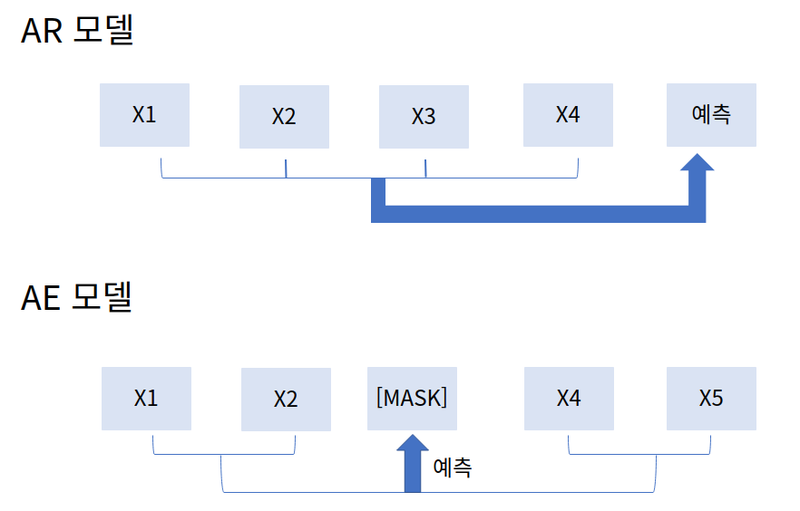 <br>

<b>AE 모델</b><br>
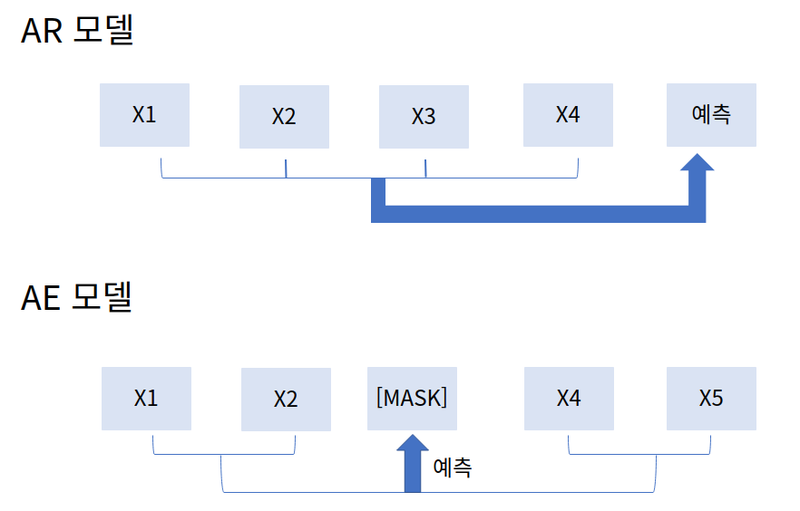

하지만 AR 모델과 AE 모델에는 각각 치명적인 단점이 있었다. AR 모델은 문맥을 양방향으로 볼 수 없었고, AE 모델은 마스킹 처리한 토큰이 독립적으로 예측되므로 토큰 사이의 의존 관계를 학습할 수 없는데다가 fine-tuning과 evaluation 시 [MASK] 토큰이 보이지 않아 불일치가 발생했다. 이런 단점을 해결하기 위해 XLNet은 permutation LM을 사용했다. XLNet은 AR과 AE의 장점만을 취하여 AE처럼 양방향 context를 모두 볼 수 있는 동시에, AR처럼 예측해야 할 토큰들 간의 dependency를 놓치지 않고 학습할 수 있었다. <br>

아래 그림에서와 같이 토큰 4개의 문장을 랜덤을 뒤섞은 결과가 [3, 2, 4, 1]일 경우 $X_3$을 예측하려고 한다. 이 경우에는 3번 토큰 정보를 넣으면 문제가 너무 쉬우므로 3번 토큰 정보를 주어서는 안 되고, 2번, 4번, 1번 토큰 역시 3번 토큰 이후에 등장하므로 입력에서 제외해야 한다. 따라서 입력값은 세그먼트의 메모리 정보이다. <br>

또다시 토큰을 랜덤으로 섞은 결과가 [2, 4, 3, 1]이고 3번 토큰을 예측해야 한다면 3번 토큰의 이전 문맥인 2번, 4번 토큰과 메모리가 입력된다. <br>

토큰을 다시 섞은 후의 시퀀스가 [1, 4, 2, 3]이고 3번 토큰을 예측할 경우의 입력 벡터는 1번, 4번, 2번 토큰과 메모리이다. 문장 시퀀스가 [4, 3, 1, 2]이고 3번 토큰을 예측할 경우는 4번 토큰과 메모리를 입력으로 넣어 줍니다. 이를 표현한 것이 아래의 그림이다.
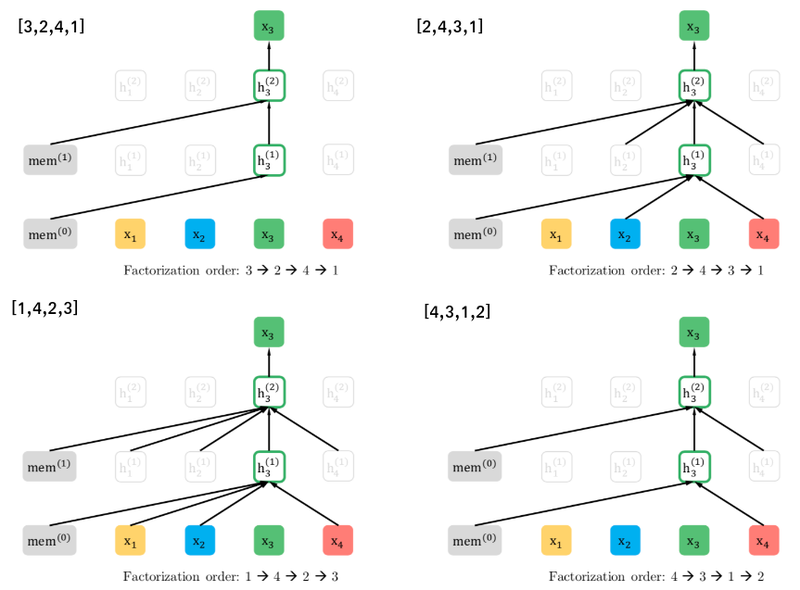 <br>


<b>Two-Stream Self-Attention</b> <br>
위와 같은 문제를 해결하이 위해 XLNet은 <b>Target-Aware Representation for Transformer</b>라는 것을 제안했다. 아래의 식에서 $P_θ$는 다음에 나올 토큰의 분포이다. 기존의 Transformer과 달리 타겟 포지션 $z_t$를 식에 추가함으로써 동일한 representation으로 다른 타깃을 맞출 수 있었다. <br>
아래 그림과 같이 T시점에서 타깃 토큰을 예측하기 위해 $g(x_z<t, Z_t)는 T시점 이전의 콘텍스트와 타깃 포지션을 사용해 이후의 토큰을 예측하려면 $g(x_z<t, Z_t)는 T시점의 콘텍스트도 가지고 있어야 한다. 즉 T시점과 T시점 이후를 모두 고려하기 위해 2가지 hidden representation을 사용해야 하고, 이 두가지를 모두 사용할 수 있는 transformer구조가 Two-Steam Self-Attention이다. 
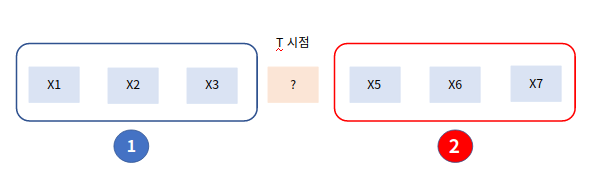 <br>
Two-Stream self-attention은 쿼리 스트림(query stream)과 컨텐트 스트림(content stream)을 혼합한 것으로, 쿼리 스트림은 T시점 이전의 토큰 정보와 T시점의 위치 정보를 나타내고, 컨텐트 스트림은 기존의 self-attention과 같이 T시점과 T시점 이전의 토큰 정보를 사용한다. <br>

아래의 그림에서 (a)는 콘텐트 스트림을 나타내고, (b)는 쿼리 스트림이다. (c)는 두 개의 스트림 어텐션을 사용한 permutation 언어 모델을 나타낸 것이다. 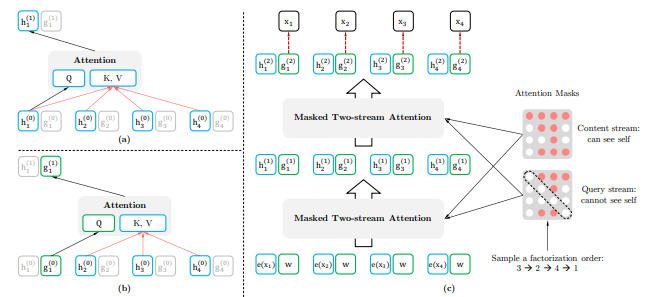 <br><br>


#### BART
BART는 특정 task가 아닌 다양한 task에 적용할 수 있도록 seq2seq 구조로 만덜어진 denoising auto-encoder이다. BART의 경우도 XLNet과 AR모델과 AE모델의 장점을 사용한 모델이라고 보면 된다. 아래의 그림과 같이 Encoder에서는 BERT와 같은 구조를, Decoder에서는 GPT와 같은 구조를 가지고 있다. 
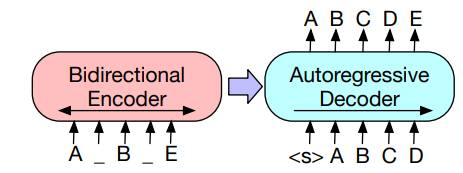 <br>

즉, 손상된 text를 입력받아 bidirectional 모델로 인코딩하고, 정답 text에 대한 likelihood를 Autoregressive decoder로 계산한다. fine-tuning할때는 손상되지 않은 문서가 encoder와 decoder모두에 들어가고, decoder의 최종 hidden state로부터의 representations를 사용하게 된다. 이런 설정은 noising이 자유롭다는 장점이 있기 때문에 BART에서는 아래와 같은 5가지 noising 방식을 사용했다. <br>
- <b>Token Masking</b>: 임의의 토큰을 마스킹하고 복구하는 방식 <br>
- <b>Token Deletion</b>: 임의의 토큰을 삭제하고 그 토큰의 위치를 찾는 방식 <br>
- <b>Token Infilling</b>: 포아송 분포를 따르는 길이의 text span을 생성해 하나의 마스크 토큰으로 마스킹하고, 크 토큰에 몇개의 토큰이 존재하는지 예측 <br>
- <b>Sentence Permutation</b>: 문장의 순서를 랜덤으로 섞는 방식 <br>
- <b>Document Rotation</b>: 토큰 하나를 정해 그 토큰을 시작점으로 하여 회전시킨 후, 문서의 시작점을 찾도록 학습<br>

https://arxiv.org/abs/1910.13461 <br>

In [ ]:
class TFBartLearnedPositionalEmbedding(TFSharedEmbeddings):
    """
    This module learns positional embeddings up to a fixed maximum size. Padding ids are ignored by either offsetting
    based on padding_idx or by setting padding_idx to None and ensuring that the appropriate position ids are passed to
    the forward function.
    """

    def __init__(self, num_embeddings: int, embedding_dim: int, padding_idx: int, offset, **kwargs):
        # Bart is set up so that if padding_idx is specified then offset the embedding ids by 2
        # and adjust num_embeddings appropriately. Other models dont have this hack
        self.offset = offset
        assert padding_idx is not None, "padding_idx cannot be None"
        num_embeddings += offset
        super().__init__(num_embeddings, embedding_dim, **kwargs)

    def call(self, input_shape: tf.TensorShape, past_key_values_length: int = 0):
        """Input is expected to be of size [bsz x seqlen]."""
        bsz, seq_len = input_shape[:2]

        positions = tf.range(
            past_key_values_length, seq_len + past_key_values_length, delta=1, dtype=tf.int32, name="range"
        )
        return super().call(positions + self.offset)  # super object is not callable for some reason


class TFBartSinusoidalPositionalEmbedding(tf.keras.layers.Embedding):
    """This module produces sinusoidal positional embeddings of any length."""

    def __init__(self, num_positions: int, embedding_dim: int, **kwargs):

        if embedding_dim % 2 != 0:
            raise NotImplementedError(f"odd embedding_dim {embedding_dim} not supported")
        super().__init__(
            num_positions,
            embedding_dim,
            **kwargs,
        )

    def build(self, input_shape: tf.TensorShape):
        """
        Build shared token embedding layer Shared weights logic adapted from
        https://github.com/tensorflow/models/blob/a009f4fb9d2fc4949e32192a944688925ef78659/official/transformer/v2/embedding_layer.py#L24
        """
        super().build(input_shape)  # Instantiates self.weight so it can be loaded
        weight: np.ndarray = self._init_weight(self.input_dim, self.output_dim)
        self.set_weights([weight])  # overwrite self.weight to correct value

    @staticmethod
    def _init_weight(n_pos: int, dim: int):
        """
        Identical to the XLM create_sinusoidal_embeddings except features are not interleaved. The cos features are in
        the 2nd half of the vector. [dim // 2:]
        """
        position_enc = np.array(
            [[pos / np.power(10000, 2 * (j // 2) / dim) for j in range(dim)] for pos in range(n_pos)]
        )
        # index 0 is all zero
        position_enc[:, 0 : dim // 2] = np.sin(position_enc[:, 0::2])
        position_enc[:, dim // 2 :] = np.cos(position_enc[:, 1::2])
        # convert to tensor
        table = tf.convert_to_tensor(position_enc, dtype=tf.float32)
        tf.stop_gradient(table)
        return table

    def call(self, input_shape: tf.TensorShape, past_key_values_length: int = 0):
        """Input is expected to be of size [bsz x seqlen]."""
        bsz, seq_len = input_shape[:2]

        positions = tf.range(
            past_key_values_length, seq_len + past_key_values_length, delta=1, dtype=tf.int32, name="range"
        )
        return super().call(positions)


class TFBartAttention(tf.keras.layers.Layer):
    """Multi-headed attention from "Attention Is All You Need"""

    def __init__(
        self,
        embed_dim: int,
        num_heads: int,
        dropout: float = 0.0,
        is_decoder: bool = False,
        bias: bool = True,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim

        self.num_heads = num_heads
        self.dropout = tf.keras.layers.Dropout(dropout)
        self.head_dim = embed_dim // num_heads
        assert self.head_dim * num_heads == self.embed_dim, "embed_dim must be divisible by num_heads"
        self.scaling = self.head_dim ** -0.5
        self.is_decoder = is_decoder

        self.k_proj = tf.keras.layers.Dense(embed_dim, use_bias=bias, name="k_proj")
        self.q_proj = tf.keras.layers.Dense(embed_dim, use_bias=bias, name="q_proj")
        self.v_proj = tf.keras.layers.Dense(embed_dim, use_bias=bias, name="v_proj")
        self.out_proj = tf.keras.layers.Dense(embed_dim, use_bias=bias, name="out_proj")

    def _shape(self, tensor: tf.Tensor, seq_len: int, bsz: int):
        return tf.transpose(tf.reshape(tensor, (bsz, seq_len, self.num_heads, self.head_dim)), (0, 2, 1, 3))

    def call(
        self,
        hidden_states: tf.Tensor,
        key_value_states: Optional[tf.Tensor] = None,
        past_key_value: Optional[Tuple[Tuple[tf.Tensor]]] = None,
        attention_mask: Optional[tf.Tensor] = None,
        training=False,
    ) -> Tuple[tf.Tensor, Optional[tf.Tensor]]:
        """Input shape: Batch x Time x Channel"""

        # if key_value_states are provided this layer is used as a cross-attention layer
        # for the decoder
        is_cross_attention = key_value_states is not None
        bsz, tgt_len, embed_dim = shape_list(hidden_states)

        # get query proj
        query_states = self.q_proj(hidden_states) * self.scaling
        # get key, value proj
        if is_cross_attention and past_key_value is not None:
            # reuse k,v, cross_attentions
            key_states = past_key_value[0]
            value_states = past_key_value[1]
        elif is_cross_attention:
            # cross_attentions
            key_states = self._shape(self.k_proj(key_value_states), -1, bsz)
            value_states = self._shape(self.v_proj(key_value_states), -1, bsz)
        elif past_key_value is not None:
            # reuse k, v, self_attention
            key_states = self._shape(self.k_proj(hidden_states), -1, bsz)
            value_states = self._shape(self.v_proj(hidden_states), -1, bsz)
            key_states = tf.concat([past_key_value[0], key_states], axis=2)
            value_states = tf.concat([past_key_value[1], value_states], axis=2)
        else:
            # self_attention
            key_states = self._shape(self.k_proj(hidden_states), -1, bsz)
            value_states = self._shape(self.v_proj(hidden_states), -1, bsz)

        if self.is_decoder:
            # if cross_attention save Tuple(tf.Tensor, tf.Tensor) of all cross attention key/value_states.
            # Further calls to cross_attention layer can then reuse all cross-attention
            # key/value_states (first "if" case)
            # if uni-directional self-attention (decoder) save Tuple(tf.Tensor, tf.Tensor) of
            # all previous decoder key/value_states. Further calls to uni-directional self-attention
            # can concat previous decoder key/value_states to current projected key/value_states (third "elif" case)
            # if encoder bi-directional self-attention `past_key_value` is always `None`
            past_key_value = (key_states, value_states)

        proj_shape = (bsz * self.num_heads, -1, self.head_dim)
        query_states = tf.reshape(self._shape(query_states, tgt_len, bsz), proj_shape)
        key_states = tf.reshape(key_states, proj_shape)
        value_states = tf.reshape(value_states, proj_shape)

        src_len = shape_list(key_states)[1]
        attn_weights = tf.matmul(query_states, key_states, transpose_b=True)

        tf.debugging.assert_equal(
            shape_list(attn_weights),
            [bsz * self.num_heads, tgt_len, src_len],
            message=f"Attention weights should be of size {(bsz * self.num_heads, tgt_len, src_len)}, but is {shape_list(attn_weights)}",
        )

        if attention_mask is not None:
            tf.debugging.assert_equal(
                shape_list(attention_mask),
                [bsz, 1, tgt_len, src_len],
                message=f"Attention mask should be of size {(bsz, 1, tgt_len, src_len)}, but is {shape_list(attention_mask)}",
            )
            attn_weights = tf.reshape(attn_weights, (bsz, self.num_heads, tgt_len, src_len)) + attention_mask
            attn_weights = tf.reshape(attn_weights, (bsz * self.num_heads, tgt_len, src_len))

        attn_weights = tf.nn.softmax(attn_weights, axis=-1)

        attn_probs = self.dropout(attn_weights, training=training)

        attn_output = tf.matmul(attn_probs, value_states)

        tf.debugging.assert_equal(
            shape_list(attn_output),
            [bsz * self.num_heads, tgt_len, self.head_dim],
            message=f"`attn_output` should be of size {(bsz, self.num_heads, tgt_len, self.head_dim)}, but is {shape_list(attn_output)}",
        )

        attn_output = tf.transpose(
            tf.reshape(attn_output, (bsz, self.num_heads, tgt_len, self.head_dim)), (0, 2, 1, 3)
        )
        attn_output = tf.reshape(attn_output, (bsz, tgt_len, embed_dim))

        attn_output = self.out_proj(attn_output)
        attn_weights: tf.Tensor = tf.reshape(attn_weights, (bsz, self.num_heads, tgt_len, src_len))

        return attn_output, attn_weights, past_key_value


class TFBartEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, config: BartConfig, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = config.d_model
        self.self_attn = TFBartAttention(
            self.embed_dim, config.encoder_attention_heads, dropout=config.attention_dropout, name="self_attn"
        )
        self.normalize_before = config.normalize_before
        self.self_attn_layer_norm = tf.keras.layers.LayerNormalization(epsilon=1e-5, name="self_attn_layer_norm")
        self.dropout = tf.keras.layers.Dropout(config.dropout)
        self.activation_fn = ACT2FN[config.activation_function]
        self.activation_dropout = tf.keras.layers.Dropout(config.activation_dropout)
        self.fc1 = tf.keras.layers.Dense(config.encoder_ffn_dim, name="fc1")
        self.fc2 = tf.keras.layers.Dense(self.embed_dim, name="fc2")
        self.final_layer_norm = tf.keras.layers.LayerNormalization(epsilon=1e-5, name="final_layer_norm")

    def call(self, hidden_states: tf.Tensor, attention_mask: tf.Tensor, training=False):
        """
        Args:
            hidden_states (:obj:`tf.Tensor`): input to the layer of shape `(seq_len, batch, embed_dim)`
            attention_mask (:obj:`tf.Tensor`): attention mask of size
                `(batch, 1, tgt_len, src_len)` where padding elements are indicated by very large negative values.
        """
        residual = hidden_states
        if self.normalize_before:
            hidden_states = self.self_attn_layer_norm(hidden_states)
        hidden_states, self_attn_weights, _ = self.self_attn(
            hidden_states=hidden_states, attention_mask=attention_mask
        )
        tf.debugging.assert_equal(
            shape_list(hidden_states),
            shape_list(residual),
            message=f"Self attn modified the shape of query {shape_list(residual)} to {shape_list(hidden_states)}",
        )
        hidden_states = self.dropout(hidden_states, training=training)
        hidden_states = residual + hidden_states
        if not self.normalize_before:
            hidden_states = self.self_attn_layer_norm(hidden_states)

        residual = hidden_states
        if self.normalize_before:
            hidden_states = self.final_layer_norm(hidden_states)
        hidden_states = self.activation_fn(self.fc1(hidden_states))
        hidden_states = self.activation_dropout(hidden_states, training=training)
        hidden_states = self.fc2(hidden_states)
        hidden_states = self.dropout(hidden_states, training=training)
        hidden_states = residual + hidden_states
        if not self.normalize_before:
            hidden_states = self.final_layer_norm(hidden_states)

        return hidden_states, self_attn_weights


class TFBartDecoderLayer(tf.keras.layers.Layer):
    def __init__(self, config: BartConfig, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = config.d_model
        self.self_attn = TFBartAttention(
            embed_dim=self.embed_dim,
            num_heads=config.decoder_attention_heads,
            dropout=config.attention_dropout,
            name="self_attn",
            is_decoder=True,
        )
        self.dropout = tf.keras.layers.Dropout(config.dropout)
        self.activation_fn = ACT2FN[config.activation_function]
        self.activation_dropout = tf.keras.layers.Dropout(config.activation_dropout)
        self.normalize_before = config.normalize_before

        self.self_attn_layer_norm = tf.keras.layers.LayerNormalization(epsilon=1e-5, name="self_attn_layer_norm")
        self.encoder_attn = TFBartAttention(
            self.embed_dim,
            config.decoder_attention_heads,
            dropout=config.attention_dropout,
            name="encoder_attn",
            is_decoder=True,
        )
        self.encoder_attn_layer_norm = tf.keras.layers.LayerNormalization(epsilon=1e-5, name="encoder_attn_layer_norm")
        self.fc1 = tf.keras.layers.Dense(config.decoder_ffn_dim, name="fc1")
        self.fc2 = tf.keras.layers.Dense(self.embed_dim, name="fc2")
        self.final_layer_norm = tf.keras.layers.LayerNormalization(epsilon=1e-5, name="final_layer_norm")

    def call(
        self,
        hidden_states,
        attention_mask: Optional[tf.Tensor] = None,
        encoder_hidden_states: Optional[tf.Tensor] = None,
        encoder_attention_mask: Optional[tf.Tensor] = None,
        past_key_value: Optional[Tuple[tf.Tensor]] = None,
        training=False,
    ) -> Tuple[tf.Tensor, tf.Tensor, Tuple[Tuple[tf.Tensor]]]:
        """
        Args:
            hidden_states (:obj:`tf.Tensor`): input to the layer of shape `(seq_len, batch, embed_dim)`
            attention_mask (:obj:`tf.Tensor`): attention mask of size
                `(batch, 1, tgt_len, src_len)` where padding elements are indicated by very large negative values.
            encoder_hidden_states (:obj:`tf.Tensor`): cross attention input to the layer of shape `(seq_len, batch, embed_dim)`
            encoder_attention_mask (:obj:`tf.Tensor`): encoder attention mask of size
                `(batch, 1, tgt_len, src_len)` where padding elements are indicated by very large negative values.
            past_key_value (:obj:`Tuple(tf.Tensor)`): cached past key and value projection states
        """
        residual = hidden_states
        if self.normalize_before:
            hidden_states = self.self_attn_layer_norm(hidden_states)

        # Self Attention
        # decoder uni-directional self-attention cached key/values tuple is at positions 1,2
        self_attn_past_key_value = past_key_value[:2] if past_key_value is not None else None
        # add present self-attn cache to positions 1,2 of present_key_value tuple
        hidden_states, self_attn_weights, present_key_value = self.self_attn(
            hidden_states=hidden_states,
            past_key_value=self_attn_past_key_value,
            attention_mask=attention_mask,
        )
        hidden_states = self.dropout(hidden_states, training=training)
        hidden_states = residual + hidden_states
        if not self.normalize_before:
            hidden_states = self.self_attn_layer_norm(hidden_states)

        # Cross-Attention Block
        cross_attn_present_key_value = None
        if encoder_hidden_states is not None:
            residual = hidden_states
            if self.normalize_before:
                hidden_states = self.encoder_attn_layer_norm(hidden_states)

            # cross_attn cached key/values tuple is at positions 3,4 of present_key_value tuple
            cross_attn_past_key_value = past_key_value[-2:] if past_key_value is not None else None
            hidden_states, _, cross_attn_present_key_value = self.encoder_attn(
                hidden_states=hidden_states,
                key_value_states=encoder_hidden_states,
                attention_mask=encoder_attention_mask,
                past_key_value=cross_attn_past_key_value,
            )
            hidden_states = self.dropout(hidden_states, training=training)
            hidden_states = residual + hidden_states
            if not self.normalize_before:
                hidden_states = self.encoder_attn_layer_norm(hidden_states)

            # add cross-attn to positions 3,4 of present_key_value tuple
            present_key_value = present_key_value + cross_attn_present_key_value

        # Fully Connected
        residual = hidden_states
        if self.normalize_before:
            hidden_states = self.final_layer_norm(hidden_states)
        hidden_states = self.activation_fn(self.fc1(hidden_states))
        hidden_states = self.activation_dropout(hidden_states, training=training)
        hidden_states = self.fc2(hidden_states)
        hidden_states = self.dropout(hidden_states, training=training)
        hidden_states = residual + hidden_states

        if not self.normalize_before:
            hidden_states = self.final_layer_norm(hidden_states)

        return (
            hidden_states,
            self_attn_weights,
            present_key_value,
        )
@keras_serializable
class TFBartEncoder(tf.keras.layers.Layer):
    config_class = BartConfig
    """
    Transformer encoder consisting of *config.encoder_layers* self attention layers. Each layer is a
    :class:`TFBartEncoderLayer`.

    Args:
        config: BartConfig
    """

    def __init__(self, config: BartConfig, embed_tokens: Optional[TFSharedEmbeddings] = None, **kwargs):
        super().__init__(**kwargs)
        self.config = config
        self.dropout = tf.keras.layers.Dropout(config.dropout)
        self.layerdrop = config.encoder_layerdrop
        self.embed_scale = math.sqrt(config.d_model) if config.scale_embedding else 1.0
        self.padding_idx = config.pad_token_id
        self.max_source_positions = config.max_position_embeddings

        self.embed_tokens = embed_tokens
        if config.static_position_embeddings:
            self.embed_positions = TFBartSinusoidalPositionalEmbedding(
                config.max_position_embeddings,
                config.d_model,
                name="embed_positions",
            )
        else:
            self.embed_positions = TFBartLearnedPositionalEmbedding(
                config.max_position_embeddings,
                config.d_model,
                self.padding_idx,
                config.extra_pos_embeddings,
                name="embed_positions",
            )
        self.layers = [TFBartEncoderLayer(config, name=f"layers.{i}") for i in range(config.encoder_layers)]
        self.layernorm_embedding = (
            tf.keras.layers.LayerNormalization(epsilon=1e-5, name="layernorm_embedding")
            if config.normalize_embedding
            else tf.keras.layers.Layer()
        )
        self.layer_norm = (
            tf.keras.layers.LayerNormalization(epsilon=1e-5, name="layer_norm")
            if config.add_final_layer_norm
            else None
        )

    def call(
        self,
        input_ids=None,
        inputs_embeds=None,
        attention_mask=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
        training=False,
        **kwargs,
    ):
        """
        Args:
            input_ids (:obj:`tf.Tensor` of shape :obj:`(batch_size, sequence_length)`):
                Indices of input sequence tokens in the vocabulary. Padding will be ignored by default should you
                provide it.

                Indices can be obtained using :class:`~transformers.BartTokenizer`. See
                :meth:`transformers.PreTrainedTokenizer.encode` and :meth:`transformers.PreTrainedTokenizer.__call__`
                for details.

                `What are input IDs? <../glossary.html#input-ids>`__
            attention_mask (:obj:`tf.Tensor` of shape :obj:`(batch_size, sequence_length)`, `optional`):
                Mask to avoid performing attention on padding token indices. Mask values selected in ``[0, 1]``:

                - 1 for tokens that are **not masked**,
                - 0 for tokens that are **masked**.

                `What are attention masks? <../glossary.html#attention-mask>`__
            inputs_embeds (:obj:`tf.Tensor` of shape :obj:`(batch_size, sequence_length, hidden_size)`, `optional`):
                Optionally, instead of passing :obj:`input_ids` you can choose to directly pass an embedded
                representation. This is useful if you want more control over how to convert :obj:`input_ids` indices
                into associated vectors than the model's internal embedding lookup matrix.
            output_attentions (:obj:`bool`, `optional`):
                Whether or not to return the attentions tensors of all attention layers. See ``attentions`` under
                returned tensors for more detail.
            output_hidden_states (:obj:`bool`, `optional`):
                Whether or not to return the hidden states of all layers. See ``hidden_states`` under returned tensors
                for more detail.
            return_dict (:obj:`bool`, `optional`):
                Whether or not to return a :class:`~transformers.file_utils.ModelOutput` instead of a plain tuple.
        """
        inputs = input_processing(
            func=self.call,
            config=self.config,
            input_ids=input_ids,
            attention_mask=attention_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
            training=training,
            kwargs_call=kwargs,
        )

        if inputs["input_ids"] is not None and inputs["inputs_embeds"] is not None:
            raise ValueError("You cannot specify both input_ids and inputs_embeds at the same time")
        elif inputs["input_ids"] is not None:
            input_shape = shape_list(inputs["input_ids"])
        elif inputs["inputs_embeds"] is not None:
            input_shape = shape_list(inputs["inputs_embeds"])[:-1]
        else:
            raise ValueError("You have to specify either input_ids or inputs_embeds")

        if inputs["inputs_embeds"] is None:
            inputs_embeds = self.embed_tokens(inputs["input_ids"])
        else:
            inputs_embeds = inputs["inputs_embeds"]

        inputs_embeds = inputs_embeds * self.embed_scale

        embed_pos = self.embed_positions(input_shape)
        hidden_states = inputs_embeds + embed_pos
        hidden_states = self.layernorm_embedding(hidden_states)
        hidden_states = self.dropout(hidden_states, training=inputs["training"])

        # check attention mask and invert
        if inputs["attention_mask"] is not None:
            # [bsz, seq_len] -> [bsz, 1, tgt_seq_len, src_seq_len]
            attention_mask = _expand_mask(inputs["attention_mask"])
        else:
            attention_mask = None

        encoder_states = () if inputs["output_hidden_states"] else None
        all_attentions = () if inputs["output_attentions"] else None

        # encoder layers
        for encoder_layer in self.layers:

            if inputs["output_hidden_states"]:
                encoder_states = encoder_states + (hidden_states,)
            # add LayerDrop (see https://arxiv.org/abs/1909.11556 for description)
            dropout_probability = random.uniform(0, 1)
            if inputs["training"] and (dropout_probability < self.layerdrop):  # skip the layer
                continue

            hidden_states, attn = encoder_layer(hidden_states, attention_mask)

            if inputs["output_attentions"]:
                all_attentions += (attn,)
        if self.layer_norm:
            hidden_states = self.layer_norm(hidden_states)
        if inputs["output_hidden_states"]:
            encoder_states = encoder_states + (hidden_states,)

        if not inputs["return_dict"]:
            return tuple(v for v in [hidden_states, encoder_states, all_attentions] if v is not None)
        return TFBaseModelOutput(
            last_hidden_state=hidden_states, hidden_states=encoder_states, attentions=all_attentions
        )


@keras_serializable
class TFBartDecoder(tf.keras.layers.Layer):
    config_class = BartConfig
    """
    Transformer decoder consisting of *config.decoder_layers* layers. Each layer is a :class:`TFBartDecoderLayer`

    Args:
        config: BartConfig
        embed_tokens: output embedding
    """

    def __init__(self, config: BartConfig, embed_tokens: Optional[TFSharedEmbeddings] = None, **kwargs):
        super().__init__(**kwargs)
        self.config = config
        self.padding_idx = config.pad_token_id
        self.embed_tokens = embed_tokens
        self.embed_scale = math.sqrt(config.d_model) if config.scale_embedding else 1.0
        self.layerdrop = config.decoder_layerdrop
        if config.static_position_embeddings:
            self.embed_positions = TFBartSinusoidalPositionalEmbedding(
                config.max_position_embeddings,
                config.d_model,
                name="embed_positions",
            )
        else:
            self.embed_positions = TFBartLearnedPositionalEmbedding(
                config.max_position_embeddings,
                config.d_model,
                self.padding_idx,
                config.extra_pos_embeddings,
                name="embed_positions",
            )
        self.layers = [TFBartDecoderLayer(config, name=f"layers.{i}") for i in range(config.decoder_layers)]
        self.layernorm_embedding = (
            tf.keras.layers.LayerNormalization(epsilon=1e-5, name="layernorm_embedding")
            if config.normalize_embedding
            else tf.keras.layers.Layer()
        )
        self.layer_norm = (
            tf.keras.layers.LayerNormalization(epsilon=1e-5, name="layer_norm")
            if config.add_final_layer_norm
            else None
        )

        self.dropout = tf.keras.layers.Dropout(config.dropout)
        self.do_blenderbot_90_layernorm = config.do_blenderbot_90_layernorm

    def call(
        self,
        input_ids=None,
        inputs_embeds=None,
        attention_mask=None,
        encoder_hidden_states=None,
        encoder_attention_mask=None,
        past_key_values=None,
        use_cache=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
        training=False,
        **kwargs,
    ):
        r"""
        Args:
            input_ids (:obj:`tf.Tensor` of shape :obj:`(batch_size, sequence_length)`):
                Indices of input sequence tokens in the vocabulary. Padding will be ignored by default should you
                provide it.

                Indices can be obtained using :class:`~transformers.BartTokenizer`. See
                :meth:`transformers.PreTrainedTokenizer.encode` and :meth:`transformers.PreTrainedTokenizer.__call__`
                for details.

                `What are input IDs? <../glossary.html#input-ids>`__
            attention_mask (:obj:`tf.Tensor` of shape :obj:`(batch_size, sequence_length)`, `optional`):
                Mask to avoid performing attention on padding token indices. Mask values selected in ``[0, 1]``:

                - 1 for tokens that are **not masked**,
                - 0 for tokens that are **masked**.

                `What are attention masks? <../glossary.html#attention-mask>`__
            encoder_hidden_states (:obj:`tf.Tensor` of shape :obj:`(batch_size, encoder_sequence_length, hidden_size)`, `optional`):
                Sequence of hidden-states at the output of the last layer of the encoder. Used in the cross-attention
                of the decoder.
            encoder_attention_mask (:obj:`tf.Tensor` of shape :obj:`(batch_size, encoder_sequence_length)`, `optional`):
                Mask to avoid performing cross-attention on padding tokens indices of encoder input_ids. Mask values
                selected in ``[0, 1]``:

                - 1 for tokens that are **not masked**,
                - 0 for tokens that are **masked**.

                `What are attention masks? <../glossary.html#attention-mask>`__
            past_key_values (:obj:`Tuple[Tuple[tf.Tensor]]` of length :obj:`config.n_layers` with each tuple having 2 tuples each of which has 2 tensors of shape :obj:`(batch_size, num_heads, sequence_length - 1, embed_size_per_head)`):
                Contains precomputed key and value hidden-states of the attention blocks. Can be used to speed up
                decoding.

                If :obj:`past_key_values` are used, the user can optionally input only the last
                :obj:`decoder_input_ids` (those that don't have their past key value states given to this model) of
                shape :obj:`(batch_size, 1)` instead of all :obj:`decoder_input_ids`` of shape :obj:`(batch_size,
                sequence_length)`.
            inputs_embeds (:obj:`tf.Tensor` of shape :obj:`(batch_size, sequence_length, hidden_size)`, `optional`):
                Optionally, instead of passing :obj:`input_ids` you can choose to directly pass an embedded
                representation. This is useful if you want more control over how to convert :obj:`input_ids` indices
                into associated vectors than the model's internal embedding lookup matrix.
            output_attentions (:obj:`bool`, `optional`):
                Whether or not to return the attentions tensors of all attention layers. See ``attentions`` under
                returned tensors for more detail.
            output_hidden_states (:obj:`bool`, `optional`):
                Whether or not to return the hidden states of all layers. See ``hidden_states`` under returned tensors
                for more detail.
            return_dict (:obj:`bool`, `optional`):
                Whether or not to return a :class:`~transformers.file_utils.ModelOutput` instead of a plain tuple.
        """
        inputs = input_processing(
            func=self.call,
            config=self.config,
            input_ids=input_ids,
            attention_mask=attention_mask,
            encoder_hidden_states=encoder_hidden_states,
            encoder_attention_mask=encoder_attention_mask,
            inputs_embeds=inputs_embeds,
            past_key_values=past_key_values,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
            training=training,
            kwargs_call=kwargs,
        )

        if inputs["input_ids"] is not None and inputs["inputs_embeds"] is not None:
            raise ValueError("You cannot specify both decoder_input_ids and decoder_inputs_embeds at the same time")
        elif inputs["input_ids"] is not None:
            input_shape = shape_list(inputs["input_ids"])
        elif inputs["inputs_embeds"] is not None:
            input_shape = shape_list(inputs["inputs_embeds"])[:-1]
        else:
            raise ValueError("You have to specify either decoder_input_ids or decoder_inputs_embeds")

        past_key_values_length = (
            inputs["past_key_values"][0][0].shape[2] if inputs["past_key_values"] is not None else 0
        )

        # embed positions
        positions = self.embed_positions(input_shape, past_key_values_length)

        if inputs_embeds is None:
            inputs_embeds = self.embed_tokens(inputs["input_ids"])
        else:
            inputs_embeds = inputs["inputs_embeds"]

        hidden_states = inputs_embeds * self.embed_scale

        # [bsz, seq_len] -> [bsz, 1, tgt_seq_len, src_seq_len]
        combined_attention_mask = None
        if input_shape[-1] > 1:
            combined_attention_mask = _make_causal_mask(input_shape, past_key_values_length=past_key_values_length)

        if inputs["attention_mask"] is None and inputs["input_ids"] is not None and input_shape[-1] > 1:
            attention_mask = tf.cast(
                tf.math.not_equal(inputs["input_ids"], self.config.pad_token_id), inputs["input_ids"].dtype
            )
        else:
            attention_mask = tf.ones(input_shape, dtype=tf.int32)

        if attention_mask is not None and combined_attention_mask is not None:
            # [bsz, seq_len] -> [bsz, 1, tgt_seq_len, src_seq_len]
            combined_attention_mask = combined_attention_mask + _expand_mask(
                attention_mask, past_key_values_length=past_key_values_length
            )

        encoder_hidden_states = inputs["encoder_hidden_states"]
        if encoder_hidden_states is not None and inputs["encoder_attention_mask"] is not None:
            # [bsz, seq_len] -> [bsz, 1, tgt_seq_len, src_seq_len]
            encoder_attention_mask = _expand_mask(inputs["encoder_attention_mask"], tgt_len=input_shape[-1])

        if self.do_blenderbot_90_layernorm:
            hidden_states = self.layernorm_embedding(hidden_states) + positions
        else:
            hidden_states = self.layernorm_embedding(hidden_states + positions)
        hidden_states = self.dropout(hidden_states, training=inputs["training"])

        # decoder layers
        all_hidden_states = ()
        all_self_attns = ()
        present_key_values = ()
        for idx, decoder_layer in enumerate(self.layers):
            # add LayerDrop (see https://arxiv.org/abs/1909.11556 for description)
            if inputs["output_hidden_states"]:
                all_hidden_states += (hidden_states,)
            dropout_probability = random.uniform(0, 1)

            if inputs["training"] and (dropout_probability < self.layerdrop):
                continue

            past_key_value = inputs["past_key_values"][idx] if inputs["past_key_values"] is not None else None

            hidden_states, layer_self_attn, present_key_value = decoder_layer(
                hidden_states,
                attention_mask=combined_attention_mask,
                encoder_hidden_states=encoder_hidden_states,
                encoder_attention_mask=encoder_attention_mask,
                past_key_value=past_key_value,
            )

            if inputs["use_cache"]:
                present_key_values += (present_key_value,)

            if inputs["output_attentions"]:
                all_self_attns += (layer_self_attn,)

        if self.layer_norm is not None:  # same as if config.add_final_layer_norm
            hidden_states = self.layer_norm(hidden_states)

        # Convert to standard output format: (seq_len, BS, model_dim) -> (BS, seq_len, model_dim)
        if inputs["output_hidden_states"]:
            all_hidden_states += (hidden_states,)
        else:
            all_hidden_states = None

        all_self_attns = list(all_self_attns) if inputs["output_attentions"] else None

        present_key_values = (encoder_hidden_states, present_key_values) if inputs["use_cache"] else None

        if not inputs["return_dict"]:
            return hidden_states, present_key_values, all_hidden_states, all_self_attns
        else:
            return TFBaseModelOutputWithPast(
                last_hidden_state=hidden_states,
                past_key_values=present_key_values,
                hidden_states=all_hidden_states,
                attentions=all_self_attns,
            )


[DOCS]@add_start_docstrings(
    "The bare BART Model outputting raw hidden-states without any specific head on top.",
    BART_START_DOCSTRING,
)
@keras_serializable
class TFBartModel(TFBartPretrainedModel):
    base_model_prefix = "model"

    def __init__(self, config: BartConfig, *inputs, **kwargs):
        super().__init__(config, *inputs, **kwargs)
        self.shared = TFSharedEmbeddings(config.vocab_size, config.d_model, config.pad_token_id, name="model.shared")

        with tf.compat.v1.variable_scope("model.shared") as shared_abs_scope_name:
            pass

        # Wraps layer to avoid problems with weight restoring and ensuring we're in the correct TF scope.
        embed_tokens = TFWrappedEmbeddings(self.shared, abs_scope_name=shared_abs_scope_name)
        embed_tokens.vocab_size = self.shared.vocab_size
        embed_tokens.hidden_size = self.shared.hidden_size

        self.encoder = TFBartEncoder(config, embed_tokens, name="encoder")
        self.decoder = TFBartDecoder(config, embed_tokens, name="decoder")

    def get_decoder(self):
        return self.decoder

[DOCS]    @add_start_docstrings_to_model_forward(BART_INPUTS_DOCSTRING.format("batch_size, sequence_length"))
    @add_code_sample_docstrings(
        tokenizer_class=_TOKENIZER_FOR_DOC,
        checkpoint="facebook/bart-large",
        output_type=TFSeq2SeqModelOutput,
        config_class=_CONFIG_FOR_DOC,
    )
    def call(
        self,
        input_ids=None,
        attention_mask=None,
        decoder_input_ids=None,
        decoder_attention_mask=None,
        encoder_outputs: Optional[Union[Tuple, TFBaseModelOutput]] = None,
        past_key_values=None,
        inputs_embeds=None,
        decoder_inputs_embeds=None,
        use_cache=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
        training=False,
        **kwargs
    ):
        inputs = input_processing(
            func=self.call,
            config=self.config,
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_input_ids=decoder_input_ids,
            decoder_attention_mask=decoder_attention_mask,
            encoder_outputs=encoder_outputs,
            past_key_values=past_key_values,
            inputs_embeds=inputs_embeds,
            decoder_inputs_embeds=decoder_inputs_embeds,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
            training=training,
            kwargs_call=kwargs,
        )

        if inputs["decoder_input_ids"] is None and inputs["decoder_inputs_embeds"] is None:
            inputs["use_cache"] = False

        inputs["output_hidden_states"] = (
            inputs["output_hidden_states"]
            if inputs["output_hidden_states"] is not None
            else self.config.output_hidden_states
        )

        if inputs["decoder_input_ids"] is None and inputs["input_ids"] is not None:
            inputs["decoder_input_ids"] = shift_tokens_right(
                inputs["input_ids"], self.config.pad_token_id, self.config.eos_token_id
            )

        if inputs["encoder_outputs"] is None:
            inputs["encoder_outputs"] = self.encoder(
                input_ids=inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                inputs_embeds=inputs["inputs_embeds"],
                output_attentions=inputs["output_attentions"],
                output_hidden_states=inputs["output_hidden_states"],
                return_dict=inputs["return_dict"],
                training=inputs["training"],
            )
        # If the user passed a tuple for encoder_outputs, we wrap it in a TFBaseModelOutput when return_dict=True
        elif inputs["return_dict"] and not isinstance(inputs["encoder_outputs"], TFBaseModelOutput):
            inputs["encoder_outputs"] = TFBaseModelOutput(
                last_hidden_state=inputs["encoder_outputs"][0],
                hidden_states=inputs["encoder_outputs"][1] if len(inputs["encoder_outputs"]) > 1 else None,
                attentions=inputs["encoder_outputs"][2] if len(inputs["encoder_outputs"]) > 2 else None,
            )
        # If the user passed a TFBaseModelOutput for encoder_outputs, we wrap it in a tuple when return_dict=False
        elif not inputs["return_dict"] and not isinstance(inputs["encoder_outputs"], tuple):
            inputs["encoder_outputs"] = inputs["encoder_outputs"].to_tuple()

        decoder_outputs = self.decoder(
            inputs["decoder_input_ids"],
            attention_mask=decoder_attention_mask,
            encoder_hidden_states=inputs["encoder_outputs"][0],
            encoder_attention_mask=inputs["attention_mask"],
            past_key_values=inputs["past_key_values"],
            inputs_embeds=inputs["decoder_inputs_embeds"],
            use_cache=inputs["use_cache"],
            output_attentions=inputs["output_attentions"],
            output_hidden_states=inputs["output_hidden_states"],
            return_dict=inputs["return_dict"],
            training=inputs["training"],
        )

        if not inputs["return_dict"]:
            return decoder_outputs + inputs["encoder_outputs"]

        return TFSeq2SeqModelOutput(
            last_hidden_state=decoder_outputs.last_hidden_state,
            past_key_values=decoder_outputs.past_key_values,
            decoder_hidden_states=decoder_outputs.hidden_states,
            decoder_attentions=decoder_outputs.attentions,
            encoder_last_hidden_state=inputs["encoder_outputs"].last_hidden_state,
            encoder_hidden_states=inputs["encoder_outputs"].hidden_states,
            encoder_attentions=inputs["encoder_outputs"].attentions,
        )


    def get_input_embeddings(self):
        return self.shared

    def set_input_embeddings(self, value):
        self.shared = value

    def get_output_embeddings(self):
        return self.shared

### 19-8 ALBERTA( A Lite BERT for Self-supervised Learning of Language Representation)
ALBERT는 '성능은 유지하면서 메모리는 적게 쓰는 좀 더 가벼운 BERT를 만들 수 없을까?'라는 질문에서부터 출발한다.

#### ALBERT의 구조
ALBERT의 기본 구조는 BERT를 따른다. 트랜스포머의 encoder를 기반으로 하며, activation function(활성화 함수)으로는 GELU를 사용하고 있다. 더 가벼운 BERT를 만들기 위해 ALBERT는 아래의 세 가지 아이디어를 적용한다.<br> 

<b> 1. Factorized Embedding Parameterization </b> <br>
BERT는 input의 token embedding(E)과 hidden layer(H)의 size가 같다.(E≡H) ALBERT는 E를 H보다 작게 만들어서 parameter의 수를 줄인다. 그 이유가 무엇일까? 왜 토큰 임베딩 사이즈(E)를 줄일까? 저자는 BERT와 같은 모델들의 성공 요인 중 하나를 context를 반영한 임베딩에 있다고 한다. 이는 위에서 word2vec의 한계를 설명하면서 이야기했던 부분이다. <br>

모델의 입장에서 context를 반영하는 부분은 트랜스포머 layer(hidden layer)를 통과하는 부분들이다. token embedding은 context와 무관한, 그저 token을 벡터화한 것에 불과하다. 따라서, E와 H의 사이즈가 꼭 같을 필요는 없다. 오히려 H의 사이즈가 클수록 성능이 높아질 가능성이 있으며, E의 사이즈를 줄여도 성능과는 크게 연관이 없어 보인다. <br>

그러나, 무작정 E나 H의 사이즈를 변경할 수는 없습니다. BERT에서는 E와 H를 같도록(tying) 모델을 설계했기 때문이다. BERT에서의 임베딩 벡터는 V * H(혹은 E)의 매트릭스였다. 성능을 위해서라면 V도 너무 작아서는 안 된다. 따라서 V도, H(E)도 커지게 되면 엄청난 수의 parameter들을 가지게 됩니다. 이는 parameter를 줄이는 방법이 아니다. 그렇다면 어떻게 효과적으로 적당한 V를 유지하면서, H는 키우고 E는 줄일 수 있을까? 정답은 <b> matrix factorization(행렬 분해)</b>에 있다. V * H의 매트릭스를 V * E와 E * H의 매트릭스로 나누는 것이다. 이런 기법은 추천 시스템 등 다양한 분야에서 널리 쓰이고 있는 기법이기도 하다. <br>
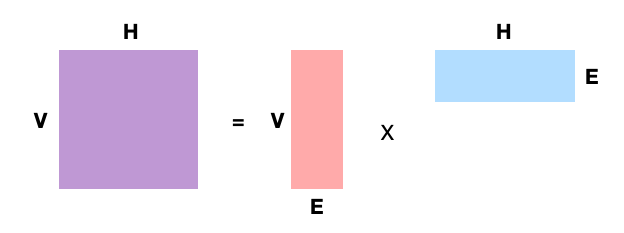 <br>
이렇게 행렬 분해를 통해 H의 사이즈는 유지한 채 E의 사이즈를 줄일 수 있다. 또한, parameter의 수도 줄일 수 있다. <br>

<b> 2. Cross-layer parameter sharing </b><br>
parameter를 공유하는 방법은 parameter의 수를 줄이는 방법 중 하나이다. ALBERT에서도 이 방식을 사용한다. layer간의 모든 parameter들을 공유하는 것이다.

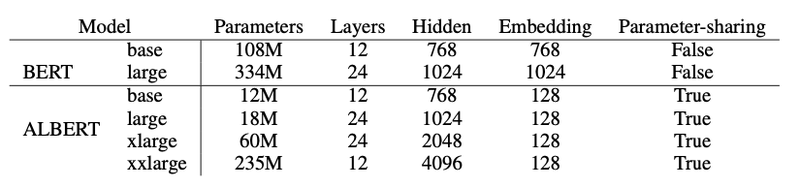 <br>
그럼 어떤 layer를 어디까지 공유하는 걸까?
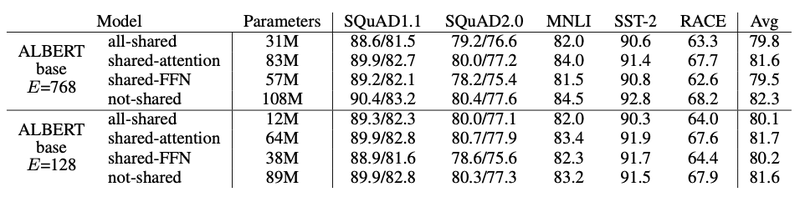 <br>
사실 모델이 parameter를 공유한다는 것은 일장일단(trade-off)이 있다. 더 많은 부분을 공유할수록 모델의 parameter의 수는 줄어들지만(경량화) 성능이 떨어질 우려가 있다. 그럼에도 불구하고 ALBERT는 기본적으로 모든 parameter들을 공유하고 있다. 마치 RNN이 한 개의 hidden state를 계속 사용하는 것처럼 ALBERT는 transformer block 1개를 이용하여 재사용한다.

<b> 3. Inter-sentence coherence loss </b><br>
BERT는 Masked-LM(MLM) Next Sentence Prediction(NSP)을 이용하여 model을 pre-train시켰다.

NSP의 경우 실제 이어지는 두 문장(positive)과, 임의로 뽑은 두 문장(negative)을 구분하는 것을 학습하게 된다. 그러나 이렇게 임의로 뽑은 문장은 첫 번째 문장과 두 번째 문장의 topic이 매우 다를 가능성이 있다. 다시 말하면, NSP는 두 문장의 연관 관계 보다 두 문장의 topic 차이를 구별하는 것에 가까울 수 있다는 것이다.

ALBERT는 이런 NSP를 과감하게 삭제하고 이를 Sentence Order Prediction(SOP)로 대체한다. SOP는 임의로 문장을 샘플링하는 것이 아니라, 실제 두 문장의 순서를 바꾸어 학습 데이터를 만든다. 두 문장의 순서가 원래의 데이터의 순서와 일치한다면 positive, 순서가 원래 데이터와 반대로 되어있다면 negative이 되는 것이다. 이러한 학습을 통해 모델은 기존의 NSP보다 훨씬 더 복잡한 언어적 사이의 연관성(논문에서는 discourse-level coherence properties라는 표현을 사용합니다)을 이해할 수 있게 되는 것이다.
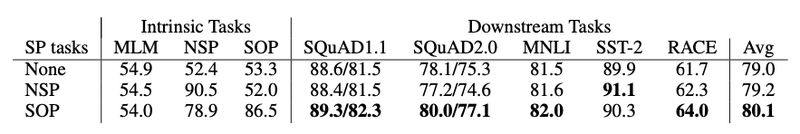

이러한 구조들을 이용하여 ALBERT-xxlarge는 BERT-large의 약 70%의 parameter들을 가지고도 오히려 성능을 개선할 수 있게 해준다. 이 밖에도 논문에서는 '같은 시간은 학습한다면?' 등 다양한 실험들을 통해 여러 시사점을 주고 있다.

그렇다면 ALBERT의 모델 부분을 코드로 한 번 확인해 볼까? 얼핏 BERT와 유사한 구조의 코드로 보이지만, TFAlbertEmbeddings의 임베딩 방식과 TFAlbertTransformer 안에서 group 단위로 파라미터가 재사용되는 부분을 유심히 살펴보자.

In [ ]:
class TFAlbertEmbeddings(tf.keras.layers.Layer):
    """word, position and token_type embeddings"""

    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.vocab_size = config.vocab_size
        self.embedding_size = config.embedding_size 
        self.initializer_range = config.initializer_range
        self.max_position_embeddings = config.max_position_embeddings
        self.type_vocab_size = config.type_vocab_size
        self.layer_norm_eps = config.layer_norm_eps
        self.hidden_dropout_prob = config.hidden_dropout_prob

        ## Albert에서는 hidden_size가 아닌 embedding_size로 embedding을 함
        self.position_embeddings = tf.keras.layers.Embedding(
            self.max_position_embeddings,
            self.embedding_size,
            embeddings_initializer=get_initializer(self.initializer_range),
            name="position_embeddings",
        )
        self.token_type_embeddings = tf.keras.layers.Embedding(
            self.type_vocab_size,
            self.embedding_size,
            embeddings_initializer=get_initializer(self.initializer_range),
            name="token_type_embeddings",
        )

        self.LayerNorm = tf.keras.layers.LayerNormalization(epsilon=self.layer_norm_eps, name="LayerNorm")
        self.dropout = tf.keras.layers.Dropout(self.hidden_dropout_prob)

    def build(self, input_shape):
        """shared word embedding layer """
        with tf.name_scope("word_embeddings"):
            self.word_embeddings = self.add_weight(
                "weight",
                shape=[self.vocab_size, self.embedding_size],
                initializer=get_initializer(self.initializer_range),
            )
        super().build(input_shape)

    def call(
        self,
        input_ids=None,
        position_ids=None,
        token_type_ids=None,
        inputs_embeds=None,
        mode="embedding",
        training=False,
    ):
        """
        input의 token embeddings
        Args:
            inputs: int64 tensors (shape [batch_size, length]) 3개를 담은 리스트: (input_ids, position_ids, token_type_ids)
            mode: "embedding" | "linear"
        Returns:
            outputs: mode == "embedding"; output embedding tensor(float32, shape [batch_size, length, embedding_size])
										 mode == "linear", output linear tensor(float32, shape [batch_size, length, vocab_size])
        Raises:
            ValueError: if mode is not valid.
				"""

        if mode == "embedding":
            return self._embedding(input_ids, position_ids, token_type_ids, inputs_embeds, training=training)
        elif mode == "linear":
            return self._linear(input_ids)
        else:
            raise ValueError("mode {} is not valid.".format(mode))

    def _embedding(self, input_ids, position_ids, token_type_ids, inputs_embeds, training=False):
        """input tensor에 기반하여 임베딩 적용"""
        assert not (input_ids is None and inputs_embeds is None)

        if input_ids is not None:
            input_shape = shape_list(input_ids)
        else:
            input_shape = shape_list(inputs_embeds)[:-1]

        seq_length = input_shape[1]
        if position_ids is None:
            position_ids = tf.range(seq_length, dtype=tf.int32)[tf.newaxis, :]
        if token_type_ids is None:
            token_type_ids = tf.fill(input_shape, 0)

        if inputs_embeds is None:
            inputs_embeds = tf.gather(self.word_embeddings, input_ids)
        position_embeddings = self.position_embeddings(position_ids)
        token_type_embeddings = self.token_type_embeddings(token_type_ids)

        embeddings = inputs_embeds + position_embeddings + token_type_embeddings
        embeddings = self.LayerNorm(embeddings)
        embeddings = self.dropout(embeddings, training=training)
        return embeddings

    def _linear(self, inputs):
        """
 			  linear layer를 통해서 input의 logit을 계산
        Args:
            inputs: float32 tensor (shape [batch_size, length, embedding_size])
        Returns:
            float32 tensor (shape [batch_size, length, vocab_size])
        """
        batch_size = shape_list(inputs)[0]
        length = shape_list(inputs)[1]
        x = tf.reshape(inputs, [-1, self.embedding_size])
        logits = tf.matmul(x, self.word_embeddings, transpose_b=True)
        return tf.reshape(logits, [batch_size, length, self.vocab_size])


class TFAlbertSelfOutput(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)
        self.dense = tf.keras.layers.Dense(
            config.hidden_size, kernel_initializer=get_initializer(config.initializer_range), name="dense"
        )
        self.LayerNorm = tf.keras.layers.LayerNormalization(epsilon=config.layer_norm_eps, name="LayerNorm")
        self.dropout = tf.keras.layers.Dropout(config.hidden_dropout_prob)

    def call(self, hidden_states, input_tensor, training=False):
        hidden_states = self.dense(hidden_states)
        hidden_states = self.dropout(hidden_states, training=training)
        hidden_states = self.LayerNorm(hidden_states + input_tensor)
        return hidden_states


class TFAlbertAttention(tf.keras.layers.Layer):
    """ dropouts and layer norm을 포함한 attention layer """

    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.hidden_size = config.hidden_size
        self.output_attentions = config.output_attentions
        self.num_attention_heads = config.num_attention_heads
        assert config.hidden_size % config.num_attention_heads == 0
        self.attention_head_size = int(config.hidden_size / config.num_attention_heads)
        self.all_head_size = self.num_attention_heads * self.attention_head_size
        self.query = tf.keras.layers.Dense(
            self.all_head_size, kernel_initializer=get_initializer(config.initializer_range), name="query"
        )
        self.key = tf.keras.layers.Dense(
            self.all_head_size, kernel_initializer=get_initializer(config.initializer_range), name="key"
        )
        self.value = tf.keras.layers.Dense(
            self.all_head_size, kernel_initializer=get_initializer(config.initializer_range), name="value"
        )
        self.dense = tf.keras.layers.Dense(
            config.hidden_size, kernel_initializer=get_initializer(config.initializer_range), name="dense"
        )
        self.LayerNorm = tf.keras.layers.LayerNormalization(epsilon=config.layer_norm_eps, name="LayerNorm")
        self.pruned_heads = set()
        # Two different dropout probabilities; see https://github.com/google-research/albert/blob/master/modeling.py#L971-L993
        self.attention_dropout = tf.keras.layers.Dropout(config.attention_probs_dropout_prob)
        self.output_dropout = tf.keras.layers.Dropout(config.hidden_dropout_prob)

    def transpose_for_scores(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_attention_heads, self.attention_head_size))

        return tf.transpose(x, perm=[0, 2, 1, 3])

    def prune_heads(self, heads):
        raise NotImplementedError

    def call(self, input_tensor, attention_mask, head_mask, output_attentions, training=False):
        batch_size = shape_list(input_tensor)[0]
        mixed_query_layer = self.query(input_tensor)
        mixed_key_layer = self.key(input_tensor)
        mixed_value_layer = self.value(input_tensor)

        query_layer = self.transpose_for_scores(mixed_query_layer, batch_size)
        key_layer = self.transpose_for_scores(mixed_key_layer, batch_size)
        value_layer = self.transpose_for_scores(mixed_value_layer, batch_size)

        # "query"와 "key"의 dot product : raw attention scores
        # (batch size, num_heads, seq_len_q, seq_len_k)
        attention_scores = tf.matmul(query_layer, key_layer, transpose_b=True)
        # scale attention_scores
        dk = tf.cast(shape_list(key_layer)[-1], tf.float32)
        attention_scores = attention_scores / tf.math.sqrt(dk)

        if attention_mask is not None:
            attention_scores = attention_scores + attention_mask

        # Normalize the attention scores to probabilities.
        attention_probs = tf.nn.softmax(attention_scores, axis=-1)

        attention_probs = self.attention_dropout(attention_probs, training=training)

        if head_mask is not None:
            attention_probs = attention_probs * head_mask

        context_layer = tf.matmul(attention_probs, value_layer)

        context_layer = tf.transpose(context_layer, perm=[0, 2, 1, 3])
        context_layer = tf.reshape(
            context_layer, (batch_size, -1, self.all_head_size)
        )  # (batch_size, seq_len_q, all_head_size)

        self_outputs = (context_layer, attention_probs) if output_attentions else (context_layer,)

        hidden_states = self_outputs[0]

        hidden_states = self.dense(hidden_states)
        hidden_states = self.output_dropout(hidden_states, training=training)
        attention_output = self.LayerNorm(hidden_states + input_tensor)

        outputs = (attention_output,) + self_outputs[1:]

        return outputs


class TFAlbertLayer(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)
        self.attention = TFAlbertAttention(config, name="attention")

        self.ffn = tf.keras.layers.Dense(
            config.intermediate_size, kernel_initializer=get_initializer(config.initializer_range), name="ffn"
        )

        if isinstance(config.hidden_act, str):
            self.activation = get_tf_activation(config.hidden_act)
        else:
            self.activation = config.hidden_act

        self.ffn_output = tf.keras.layers.Dense(
            config.hidden_size, kernel_initializer=get_initializer(config.initializer_range), name="ffn_output"
        )
        self.full_layer_layer_norm = tf.keras.layers.LayerNormalization(
            epsilon=config.layer_norm_eps, name="full_layer_layer_norm"
        )
        self.dropout = tf.keras.layers.Dropout(config.hidden_dropout_prob)

    def call(self, hidden_states, attention_mask, head_mask, output_attentions, training=False):
        attention_outputs = self.attention(
            hidden_states, attention_mask, head_mask, output_attentions, training=training
        )
        ffn_output = self.ffn(attention_outputs[0])
        ffn_output = self.activation(ffn_output)
        ffn_output = self.ffn_output(ffn_output)
        ffn_output = self.dropout(ffn_output, training=training)

        hidden_states = self.full_layer_layer_norm(ffn_output + attention_outputs[0])

        outputs = (hidden_states,) + attention_outputs[1:]
        return outputs


class TFAlbertLayerGroup(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.output_attentions = config.output_attentions
        self.output_hidden_states = config.output_hidden_states
        self.albert_layers = [
            TFAlbertLayer(config, name="albert_layers_._{}".format(i)) for i in range(config.inner_group_num)
        ]

    def call(self, hidden_states, attention_mask, head_mask, output_attentions, output_hidden_states, training=False):
        layer_hidden_states = ()
        layer_attentions = ()

        for layer_index, albert_layer in enumerate(self.albert_layers):
            layer_output = albert_layer(
                hidden_states, attention_mask, head_mask[layer_index], output_attentions, training=training
            )
            hidden_states = layer_output[0]

            if output_attentions:
                layer_attentions = layer_attentions + (layer_output[1],)

            if output_hidden_states:
                layer_hidden_states = layer_hidden_states + (hidden_states,)

        outputs = (hidden_states,)
        if output_hidden_states:
            outputs = outputs + (layer_hidden_states,)
        if output_attentions:
            outputs = outputs + (layer_attentions,)
        # last-layer hidden state, (layer hidden states), (layer attentions)
        return outputs


class TFAlbertTransformer(tf.keras.layers.Layer):
    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)

        self.num_hidden_layers = config.num_hidden_layers
        self.num_hidden_groups = config.num_hidden_groups
        self.embedding_hidden_mapping_in = tf.keras.layers.Dense(
            config.hidden_size,
            kernel_initializer=get_initializer(config.initializer_range),
            name="embedding_hidden_mapping_in",
        )
        self.albert_layer_groups = [
            TFAlbertLayerGroup(config, name="albert_layer_groups_._{}".format(i))
            for i in range(config.num_hidden_groups)
        ]

    def call(
        self,
        hidden_states,
        attention_mask,
        head_mask,
        output_attentions,
        output_hidden_states,
        return_dict,
        training=False,
    ):
        hidden_states = self.embedding_hidden_mapping_in(hidden_states)
        all_attentions = () if output_attentions else None
        all_hidden_states = (hidden_states,) if output_hidden_states else None

        for i in range(self.num_hidden_layers):
            # Number of layers in a hidden group
            layers_per_group = int(self.num_hidden_layers / self.num_hidden_groups)

            # Index of the hidden group
            group_idx = int(i / (self.num_hidden_layers / self.num_hidden_groups))

            layer_group_output = self.albert_layer_groups[group_idx](
                hidden_states,
                attention_mask,
                head_mask[group_idx * layers_per_group : (group_idx + 1) * layers_per_group],
                output_attentions,
                output_hidden_states,
                training=training,
            )
            hidden_states = layer_group_output[0]

            if output_attentions:
                all_attentions = all_attentions + layer_group_output[-1]

            if output_hidden_states:
                all_hidden_states = all_hidden_states + (hidden_states,)

        if not return_dict:
            return tuple(v for v in [hidden_states, all_hidden_states, all_attentions] if v is not None)
        return TFBaseModelOutput(
            last_hidden_state=hidden_states, hidden_states=all_hidden_states, attentions=all_attentions
        )

@keras_serializable
class TFAlbertMainLayer(tf.keras.layers.Layer):
"""
모델의 전체구조
"""
    config_class = AlbertConfig

    def __init__(self, config, **kwargs):
        super().__init__(**kwargs)
        self.num_hidden_layers = config.num_hidden_layers
        self.output_attentions = config.output_attentions
        self.output_hidden_states = config.output_hidden_states
        self.return_dict = config.use_return_dict

        self.embeddings = TFAlbertEmbeddings(config, name="embeddings")
        self.encoder = TFAlbertTransformer(config, name="encoder")
        self.pooler = tf.keras.layers.Dense(
            config.hidden_size,
            kernel_initializer=get_initializer(config.initializer_range),
            activation="tanh",
            name="pooler",
        )

    def get_input_embeddings(self):
        return self.embeddings

    def set_input_embeddings(self, value):
        self.embeddings.word_embeddings = value
        self.embeddings.vocab_size = value.shape[0]

    def _resize_token_embeddings(self, new_num_tokens):
        raise NotImplementedError

    def _prune_heads(self, heads_to_prune):
        raise NotImplementedError

    def call(
        self,
        inputs,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
        training=False,
    ):
        if isinstance(inputs, (tuple, list)):
            input_ids = inputs[0]
            attention_mask = inputs[1] if len(inputs) > 1 else attention_mask
            token_type_ids = inputs[2] if len(inputs) > 2 else token_type_ids
            position_ids = inputs[3] if len(inputs) > 3 else position_ids
            head_mask = inputs[4] if len(inputs) > 4 else head_mask
            inputs_embeds = inputs[5] if len(inputs) > 5 else inputs_embeds
            output_attentions = inputs[6] if len(inputs) > 6 else output_attentions
            output_hidden_states = inputs[7] if len(inputs) > 7 else output_hidden_states
            return_dict = inputs[8] if len(inputs) > 8 else return_dict
            assert len(inputs) <= 9, "Too many inputs."
        elif isinstance(inputs, (dict, BatchEncoding)):
            input_ids = inputs.get("input_ids")
            attention_mask = inputs.get("attention_mask", attention_mask)
            token_type_ids = inputs.get("token_type_ids", token_type_ids)
            position_ids = inputs.get("position_ids", position_ids)
            head_mask = inputs.get("head_mask", head_mask)
            inputs_embeds = inputs.get("inputs_embeds", inputs_embeds)
            output_attentions = inputs.get("output_attentions", output_attentions)
            output_hidden_states = inputs.get("output_hidden_states", output_hidden_states)
            return_dict = inputs.get("return_dict", return_dict)
            assert len(inputs) <= 9, "Too many inputs."
        else:
            input_ids = inputs

        output_attentions = output_attentions if output_attentions is not None else self.output_attentions
        output_hidden_states = output_hidden_states if output_hidden_states is not None else self.output_hidden_states
        return_dict = return_dict if return_dict is not None else self.return_dict

        if input_ids is not None and inputs_embeds is not None:
            raise ValueError("You cannot specify both input_ids and inputs_embeds at the same time")
        elif input_ids is not None:
            input_shape = shape_list(input_ids)
        elif inputs_embeds is not None:
            input_shape = shape_list(inputs_embeds)[:-1]
        else:
            raise ValueError("You have to specify either input_ids or inputs_embeds")

        if attention_mask is None:
            attention_mask = tf.fill(input_shape, 1)
        if token_type_ids is None:
            token_type_ids = tf.fill(input_shape, 0)

        # 3D attention mask 만들기
        # Sizes : [batch_size, 1, 1, to_seq_length]
        # 3D attention mask를 [batch_size, num_heads, from_seq_length, to_seq_length]로 브로드캐스팅

        extended_attention_mask = attention_mask[:, tf.newaxis, tf.newaxis, :]

				# attention_mask가 1.0이면 포함, 0.0이면 미포함 하여 attention 계산
        extended_attention_mask = tf.cast(extended_attention_mask, tf.float32)
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0

        # head_mask가 1.0이면, head를 유지
        # attention_probs : shape bsz x n_heads x N x N
        # input head_mask : shape [num_heads] 또는 [num_hidden_layers x num_heads]
        # head_mask : shape [num_hidden_layers x batch x num_heads x seq_length x seq_length
        if head_mask is not None:
            raise NotImplementedError
        else:
            head_mask = [None] * self.num_hidden_layers
            # head_mask = tf.constant([0] * self.num_hidden_layers)

        embedding_output = self.embeddings(input_ids, position_ids, token_type_ids, inputs_embeds, training=training)
        encoder_outputs = self.encoder(
            embedding_output,
            extended_attention_mask,
            head_mask,
            output_attentions,
            output_hidden_states,
            return_dict,
            training=training,
        )

        sequence_output = encoder_outputs[0]
        pooled_output = self.pooler(sequence_output[:, 0])

        if not return_dict:
            return (
                sequence_output,
                pooled_output,
            ) + encoder_outputs[1:]

        return TFBaseModelOutputWithPooling(
            last_hidden_state=sequence_output,
            pooler_output=pooled_output,
            hidden_states=encoder_outputs.hidden_states,
            attentions=encoder_outputs.attentions,
        )

https://arxiv.org/abs/1909.11942 <br>


<b>ALBERT에 사용된 방법 중, 연산가능한 파라미터의 수를 줄여준 것은 무엇이었나?</b>
ALBERT에 사용된 기법 세 가지 중 파라미터가 감소한 원인은 factorized embedding parameterization과 cross-layer parameter sharing 두 가지 이다. Factorized embedding parameterization을 통해 임베딩 벡터의 크기가 축소되고, parameter sharing은 서로 레이어들이 각자만의 파라미터를 갖지 않고 하나를 공유하게끔 하기 때문이다. Sentence Order Prediction(SOP) task를 통한 inter-sentence coherence loss 기법은 파라미터를 줄이는 것이 아닌, 학습 방식을 바꾸는 것을 의미한다.